In [24]:
# Import library dan pembacaan file csv

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from google.colab import files

uploaded = files.upload()


Saving insurance_2.csv to insurance_2.csv


In [25]:
import pandas as pd

df = pd.read_csv('insurance_2.csv')
df.head(10)


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


Sebelum melakukan analisis lebih lanjut, dataset akan dilihat terlebih dahulu untuk memastikan tidak ada nilai yang kosong

In [26]:
# Display informasi tiap kolom dari datasaet

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Dataset yang ada terlihat bersih dan tidak ada nilai yang kosong, sehingga bisa langsung dilakukan analisis. Selanjutnya, dapat dilakukan pratinjau sebagai berikut.

**Sebaran Data**

Numerik (int64 dan float64)

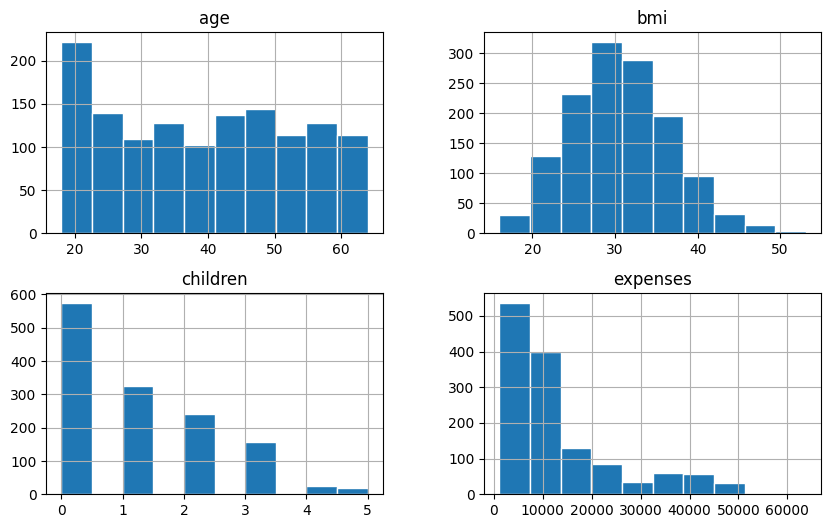

In [36]:
# Plot kolom numerik dari dataset untuk menampilkan histogram
# Menampilkan histogram
df[['age','bmi','children','expenses']].hist(figsize=(10, 6), bins=10, edgecolor='w', linewidth=1)
plt.show()


Grafik di atas memberikan gambaran sebaran nilai untuk age di mana pengguna yang berusia 20an tahun memuncaki nilai sebanyak lebih dari 200 pengguna. BMI pengguna paling banyak berada di rentang 28-30. Pengguna yang *tidak* punya anak jumlahnya paling banyak dibandingkan dengan pengguna yang memiliki anak, baik itu satu, dua, tiga, empat, atau lima. Untuk besaran biaya pengguna, biaya yang berada di bawah 10,000 terkonsentrasi secara jelas.

**Kategorik (Object)**

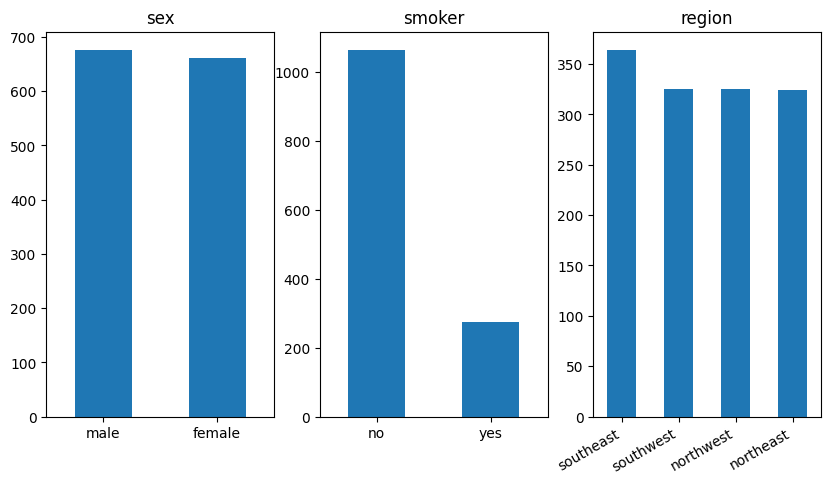

In [37]:
# Plot kolom kategorik dari dataset

categorical_features = ['sex', 'smoker', 'region']
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind='bar',rot=0, 
                                    figsize = (10, 5), ax=ax[i]).set_title(categorical_feature)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

Dari grafik diketahui bahwa rasio gender pengguna relatif sama antara laki-laki dan perempuan. Untuk kondisi merokok, ada ketimpangan yang sangat mencolok antara jumlah perokok dan non perokok. Sedangkan untuk region, hanya southwest yang mempunyai pengguna di atas 350 orang.

**Analisis Deskriptif**

In [38]:
# Display analisis deskriptif dari kolom numerik

df_desc = df.describe()
df_desc

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


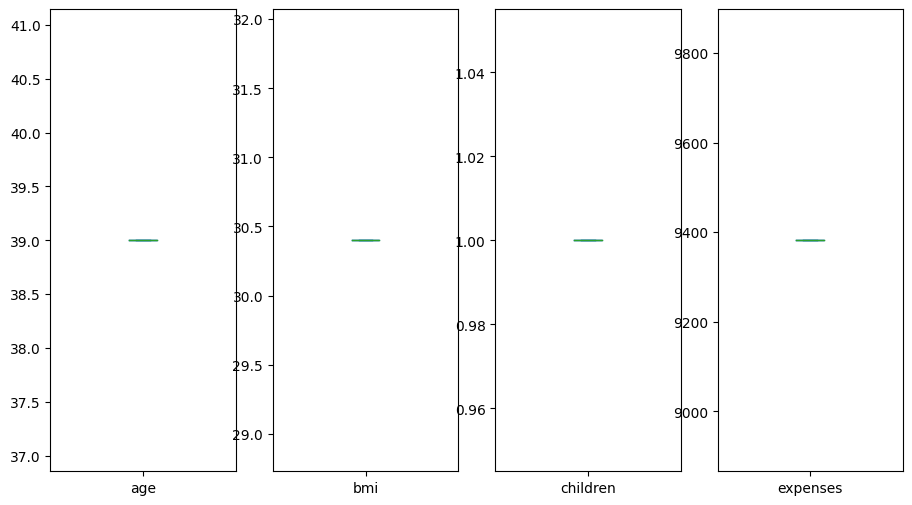

In [39]:
df_desc[df_desc.index=='50%'].plot(kind='box', subplots=True, rot=0, figsize=(11,6), legend=False)
plt.show()

Tabel di atas menunjukkan deskriptif statistik dari age, bmi, children, dan expenses. Dapat dilihat bahwa median pengguna asuransi berada di usia 39 tahun, median BMI berada pada 30.4, median jumlah anak yang dimiliki pengguna adalah 1, dan median biaya pengguna adalah $9380.

Hubungan antar variabel

Telah menjadi pemahaman umum bahwa biaya asuransi dipengaruhi oleh banyak faktor, seperti: kondisi merokok, jenis kelamin, usia, BMI, dan sebagainya. Pertanyaannya, apakah benar paradigma tersebut mempengaruhi biaya asuransi. Untuk menjawabnya, diperlihatkan pada sesi berikut.

**Biaya berdasarkan usia**

In [41]:
# Kategorikan usia kemudian display deskriptif statistik dari masing-masing kategori tersebut

bins= [0,20,40,60,100] # first index is excluded, last index is included
labels = [
         '~20',
         '20-40',
         '40-60',
         '60~'
        ]
df['age_class']= pd.cut(
   df['age'], 
   bins = bins, 
   labels = labels,
   include_lowest = False
   )

expenses_by_age = (df.groupby('age_class')
 [['expenses']]
 .agg([len, min, max, 'mean', 'median'])
)
print(expenses_by_age)

          expenses                                             
               len       min       max          mean     median
age_class                                                      
~20            166   1121.87  39722.75   8713.482771   2202.285
20-40          535   1515.34  58571.07  10686.686748   5312.170
40-60          546   5699.84  63770.43  15888.757821  11071.860
60~             91  12557.61  49577.66  21063.163407  14394.560


Dari data di atas, dapat diambil kesimpulan sementara bahwa semakin tua usia pengguna, semakin besar biaya yang harus dikeluarkan untuk asuransi. Gambaran umum perbandingan nilainya ditampilkan pada grafik berikut.

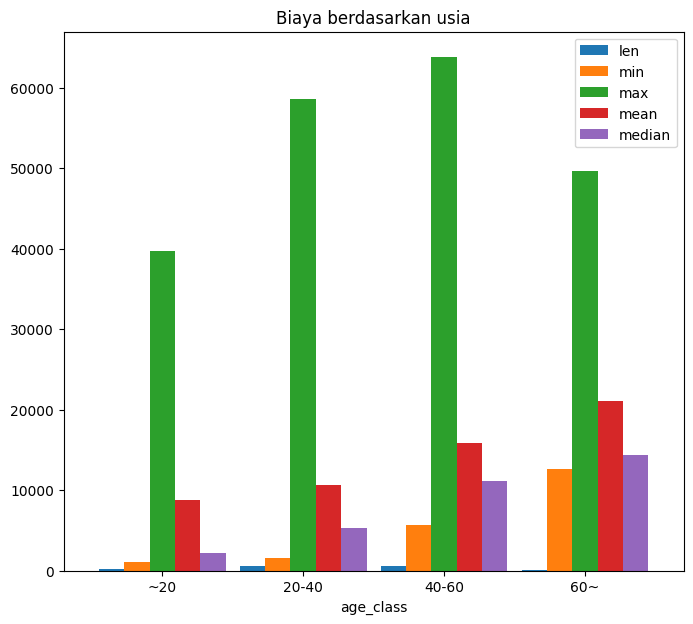

In [42]:
# Plot grafik dari biaya berdasarkan usia

expenses_by_age['expenses'].plot(kind='bar', figsize=(8,7), width=0.9, rot=0, title='Biaya berdasarkan usia')
plt.show()

Selain nilai biaya maksimal, dapat dilihat bahwa semakin bertambahnya usia, semakin bertambah pula nilai minimal, mean, dan median biayanya. Perlu investigasi lebih lanjut dan mendalam mengapa nilai maksimal justru berada pada rentang usia 40 sampai 60 tahun.

**Biaya berdasarkan gender**

In [43]:
# Membagi data berdasarkan gender: pria dan wanita, kemudian display nilai desktriptif statistiknya

charges_by_sex = df.groupby('sex')[['expenses']].agg([len, min, max, 'mean', 'median'])
print(charges_by_sex)

       expenses                                           
            len      min       max          mean    median
sex                                                       
female      662  1607.51  63770.43  12569.578897  9412.965
male        676  1121.87  62592.87  13956.751420  9369.615


Tabel di atas menunjukkan bahwa dari total 1338 pengguna, distirbusi pria lebih banyak 14 pengguna daripada wanita. Sedangkan untuk rata-rata biaya berdasarkan gender, pengguna pria membayar 1.11 kali lebih mahal daripada wanita.

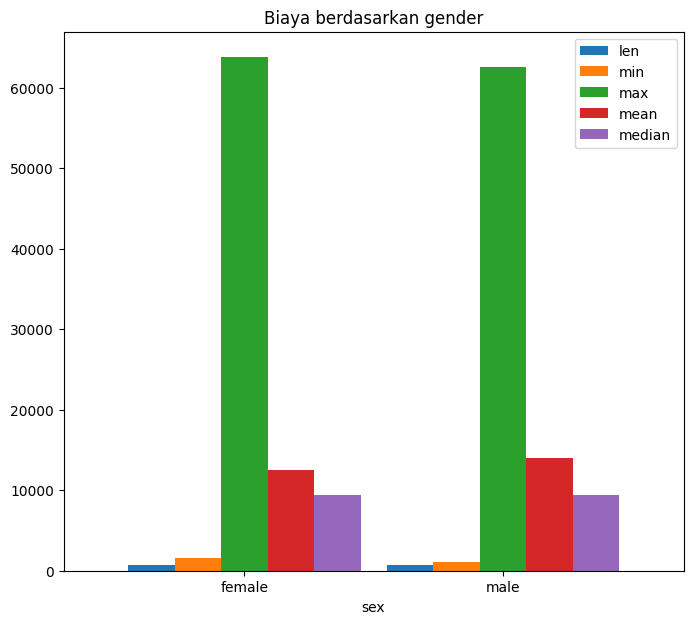

In [44]:
# Plot grafik dari biaya berdasarkan gender

charges_by_sex['expenses'].plot(kind='bar', figsize=(8,7), width=0.9, rot=0, title='Biaya berdasarkan gender')
plt.show()

Pada grafik ditunjukkan nilai min dan max dari masing-masing gender dan tidak terlihat signifikan perbedaanya.

Biaya berdasarkan BMI
Berdasarkan situs https://www.cdc.gov/obesity/basics/adult-defining.html, BMI bisa dikelompokkan menjadi:

*   Kurang dari 18.5 : underweight
*   18.5 sampai kurang dari 25.0 : healthy
*   25.0 sampai kurang dari 30 : overweight
*   Di atas 30 : obesity

Sehingga, dataset yang ada BMI dikelompokkan sebagaimana disebutkan.

In [45]:
# Kategorikan bmi kemudian display deskriptif statistik dari masing-masing kategori tersebut

bins= [0,18.5,25.0,30,100]
labels = [
         'underweight',
         'healthy',
         'overweight',
         'obesity'
         ]

df['bmi_class']= pd.cut(
   df['bmi'], 
   bins = bins, 
   labels = labels,
   include_lowest = False
   )

expenses_by_bmi = (df.groupby('bmi_class')
 [['expenses']]
 .agg([len, min, max, 'mean', 'median'])
)
print(expenses_by_bmi)

            expenses                                            
                 len      min       max          mean     median
bmi_class                                                       
underweight       21  1621.34  32734.19   8657.621429   6640.540
healthy          226  1121.87  35069.37  10435.440752   8604.150
overweight       393  1252.41  38245.59  11034.944784   8703.460
obesity          698  1131.51  63770.43  15585.776834  10003.655


Dari tabel bisa dikatakan bahwa semakin tinggi nilai BMI, semakin tinggi pula rata-rata biaya yang harus dibayar pengguna asuransi. Untuk visualisasi antar-kategori, diberikan grafik berikut

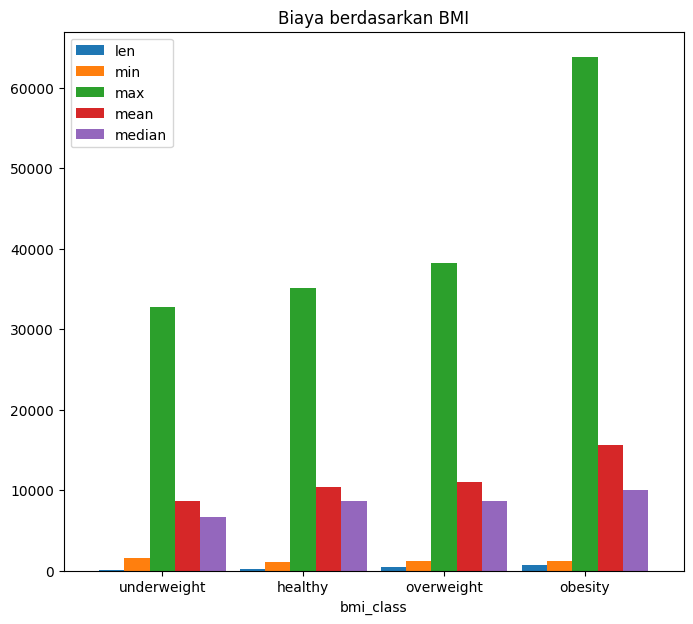

In [46]:
# Plot grafik dari biaya berdasarkan bmi

expenses_by_bmi['expenses'].plot(kind='bar', figsize=(8,7), width=0.9, rot=0, title = 'Biaya berdasarkan BMI')
plt.show()

Pada nilai biaya minimal, pengguna yang masuk kategori underweight justru membayar biaya lebih tinggi (sekitar $500) daripada pengguna kategori lain, di mana hal ini perlu investigasi lebih lanjut. Pada nilai mean dan median, semakin besar nilai BMI semakin besar pula tagihannya. Peningkatan secara signifikan terjadi pada nilai biaya maksimal pengguna dengan kategori obesity yang mempunyai nilai sekitar 60% lebih tinggi daripada pengguna lain.

**Berdasarkan jumlah anak**

In [47]:
# Membagi data berdasarkan jumlah anak: 0, 1, 2, 3, 4, dan 5, kemudian display nilai desktriptif statistiknya

expenses_by_children = df.groupby('children')[['expenses']].agg([len, min, max, 'mean', 'median'])
print(expenses_by_children)

         expenses                                            
              len      min       max          mean     median
children                                                     
0             574  1121.87  63770.43  12365.975767   9856.950
1             324  1711.03  58571.07  12731.171821   8483.870
2             240  2304.00  49577.66  15073.564000   9264.980
3             157  3443.06  60021.40  15355.318535  10600.550
4              25  4504.66  40182.25  13850.656800  11033.660
5              18  4687.80  19023.26   8786.035556   8589.565


Tabel menunjukkan bahwa penambahan jumlah anak tidak linier dengan biaya pengguna, dibuktikan dengan rata-rata biaya yang fluktuatif terhadap jumlah anak

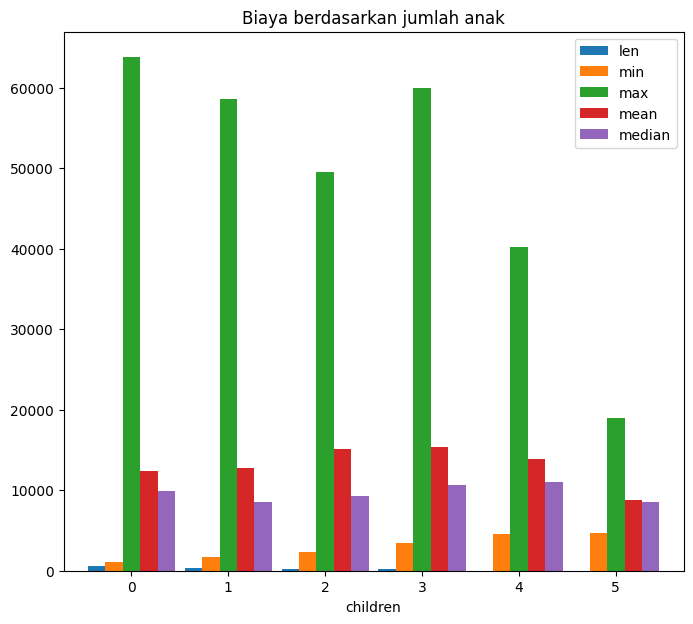

In [48]:
# Plot grafik dari biaya berdasarkan jumlah anak

expenses_by_children['expenses'].plot(kind='bar', figsize=(8,7), width=0.9, rot=0, 
                                    title='Biaya berdasarkan jumlah anak')
plt.show()

Hal menarik yang bisa dilihat dari grafik di atas adalah:

*   Biaya minimal pengguna naik berdasarkan jumlah anak: ini sangat masuk akal karena semakin banyak jumlah anak, semakin banyak orang yang harus dilindungi asuransi.
*   Biaya maksimal pengguna cenderung turun berdasarkan jumlah anak, kecuali pada jumlah anak 3: perlu dilakukan investigasi lebih lanjut dan mendalam mengapa hal ini bisa terjadi.
*   Biaya rata-rata pengguna turun pada jumlah anak 5, yang sangat bertolak belakang dengan poin nomor 1. Lagi-lagi diperlukan analisis mendalam tentang hal ini.

**Biaya berdasarkan kondisi merokok**

In [49]:
# Membagi data berdasarkan kondisi merokok: smoker dan non smoker, 
# kemudian display nilai desktriptif statistiknya

expenses_by_smoker = df.groupby('smoker')[['expenses']].agg([len, min, max, 'mean', 'median'])
print(expenses_by_smoker)

       expenses                                             
            len       min       max          mean     median
smoker                                                      
no         1064   1121.87  36910.61   8434.268449   7345.405
yes         274  12829.46  63770.43  32050.231971  34456.350


Tabel di atas menunjukkan perbedaan yang signifikan antara rata-rata biaya perokok dan non perokok, di mana perokok membayar hampir 4 kali biaya dari pengguna non perokok.

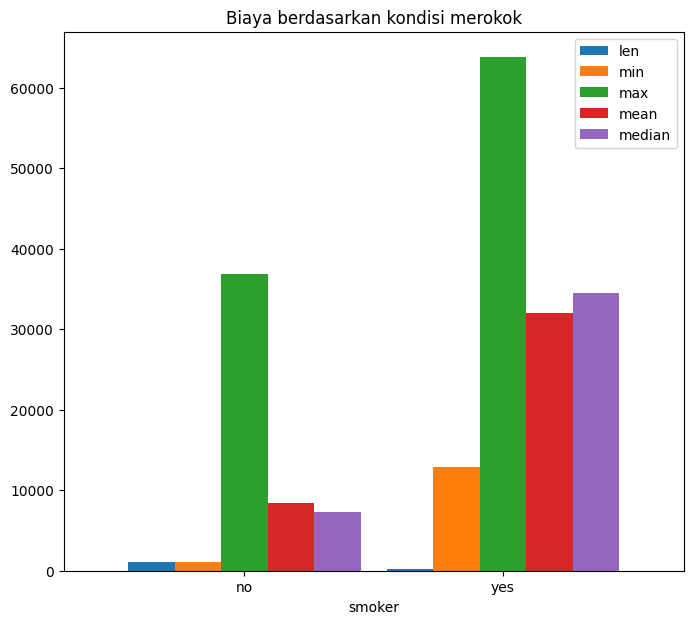

In [50]:
# Plot grafik dari biaya berdasarkan gender

expenses_by_smoker['expenses'].plot(kind='bar', figsize=(8,7), width=0.9, rot=0, 
                                  title='Biaya berdasarkan kondisi merokok')
plt.show()

Diberikan grafik yang menggambarkan perbedaan biaya perokok dan non perokok. Semua nilai: minimal biaya, maksimal biaya, mean, dan median perokok selalu lebih besar daripada non perokok.

**Biaya berdasarkan region**

In [51]:
# Membagi data berdasarkan region: southwest, southeast, northwest, dan northeast, 
# kemudian display nilai desktriptif statistiknya

expenses_by_region = df.groupby('region')[['expenses']].agg([len, min, max, 'mean', 'median'])
print(expenses_by_region)

          expenses                                            
               len      min       max          mean     median
region                                                        
northeast      324  1694.80  58571.07  13406.384691  10057.655
northwest      325  1621.34  60021.40  12417.575169   8965.800
southeast      364  1121.87  63770.43  14735.411538   9294.130
southwest      325  1241.57  52590.83  12346.937908   8798.590


Dari tabel dapat dikatakan bahwa persebaran pengguna relatif sama di tiap region. Untuk nilai rata-rata dan maksimal biaya, region southeast lebih besar daripada region lainnya. Lagi-lagi, perlu investigasi lebih lanjut mengapa hal ini bisa terjadi.

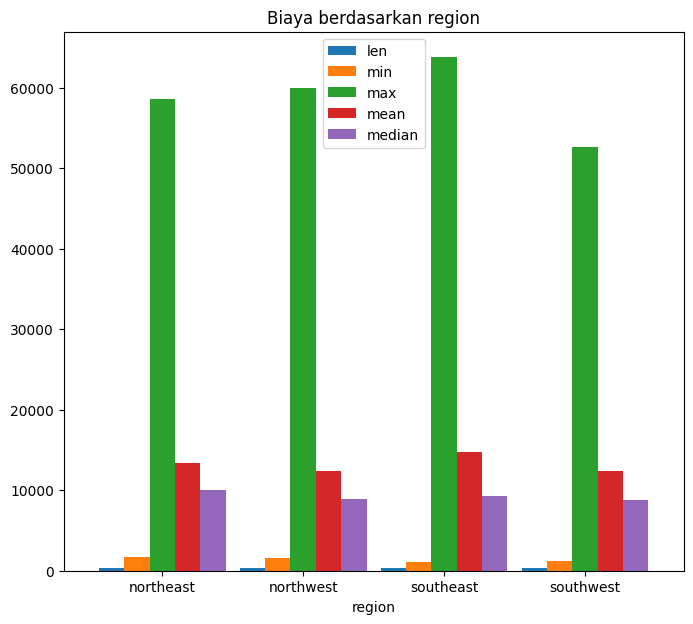

In [52]:
# Plot grafik dari biaya berdasarkan region

expenses_by_region['expenses'].plot(kind='bar', figsize=(8,7), width=0.9, rot=0,
                                 title='Biaya berdasarkan region')
plt.show()

Grafik di atas menunjukkan nilai mean dari tiap region cenderung tidak berpengaruh di mana pengguna itu tinggal.

Dari hubungan antar-variabel dapat ditarik kesimpulan sementara bahwa besarnya biaya dipengaruhi oleh:

*   Umur: semakin berumur pengguna, biaya yang dikeluargan semakin besar
*   Gender: pria cenderung membayar 1.11 kali lebih mahal dibanding wanita
*   BMI: pengguna dengan BMI di atas 30 (masuk kategori obesity) mempunyai biaya lebih mahal daripada daripada pengguna dengan BMI di bawah 30
*   Kondisi merokok: pengguna perokok membayar rata-rata biaya 4 kali lebih mahal daripada pengguna non perokok

**Korelasi antar variabel**

Setelah melihat hubungan antara biaya berdasarkan tiap variabel lainnya, pada sesi berikut akan diberikan gambaran umum seberapa besar korelasi variabel-variabel tersebut terhadap biaya.

Sebelum melihat korelasi tiap variabel terhadap biaya, akan dilakukan penormalan variabel kategorik sex, bmi, dan smoker menjadi angka yang mewakili nilainya masing masing.

Untuk kategori sex, penormalan mengikuti kaidah berikut:

sex: female = 0
sex: male = 1

Untuk BMI, penormalan mengikuti kaidah berikut:

bmi >= 30 (obese) = 1
bmi < 30 (not obese) = 0

Untuk kolom smoker, penormalan mengikuti kaidah berikut:

smoker: yes = 1
smoker: no = 0

In [53]:
# Fungsi untuk penormalan gender

def map_gender(column):
    mapped = []
    for row in column:
        if row == 'female':
            mapped.append(0)
        else:
            mapped.append(1)
    return mapped

df['gender_norm'] = map_gender(df['sex'])

In [54]:
# Fungsi untuk penormlana BMI

def map_bmi(column):
    mapped = []
    for row in column:
        if row < 30: # BMI kurang dari 30 bukan termasuk obesity
            mapped.append(0)
        else:
            mapped.append(1)
    return mapped

df['bmi_norm'] = map_bmi(df['bmi'])

In [55]:
# Fungsi untuk penormalan smoker

def map_smoking(column):
    mapped = []
    for row in column:
        if row == 'yes':
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped

df['smoker_norm'] = map_smoking(df['smoker'])

In [56]:
dfcorr = df.corr().abs()
dfcorr

,age,bmi,children,expenses,gender_norm,bmi_norm,smoker_norm
age,1.000000,0.109341,0.042469,0.299008,0.020856,0.085668,0.025019
bmi,0.109341,1.000000,0.012645,0.198576,0.046380,0.799373,0.003968
children,0.042469,0.012645,1.000000,0.067998,0.017163,0.009807,0.007673
expenses,0.299008,0.198576,0.067998,1.000000,0.057292,0.199532,0.787251
gender_norm,0.020856,0.046380,0.017163,0.057292,1.000000,0.047317,0.076185
bmi_norm,0.085668,0.799373,0.009807,0.199532,0.047317,1.000000,0.000810
smoker_norm,0.025019,0.003968,0.007673,0.787251,0.076185,0.000810,1.000000


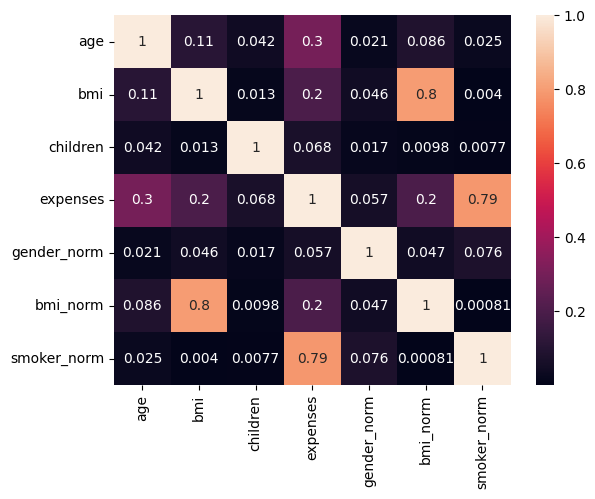

In [57]:
corrheat = sns.heatmap(dfcorr, annot= True)

Heat map di atas memperlihatkan bahwa:

*   Age berkorelasi 0.3 terhadap expenses, yang berarti semakin tua usia pengguna biaya bisa menjadi lebih mahal.
*   BMI berkorelasi 0.2 terhadap expenses, yang berarti semakin tinggi bmi biaya bisa menjadi lebih mahal.
*   Children berkolerasi 0.068 terhadap expenses, menandakan jumlah anak sangat sedikit pengaruhnya terhadap biaya.
*   Sex berkorelasi 0.057 terhadap expenses, menandakan tidak ada perbedaan signifikan pria atau wanita terhadap biaya.
*   BMI norm (obesity) berkorelasi 0.2 terhadap expenses, yang berarti jika pengguna tersebut termasuk obesitas biaya asuransi akan cenderung lebih tinggi daripada pengguna non obesitas.
*   Smoker norm berkolerasi 0.79 terhadap biaya, yang berarti bila pengguna merupakan perokok, biaya yang harus dibayarkan lebih mahal daripada pengguna non merokok.

**Nilai rata-rata variabel berdasarkan variabel**

**Usia perokok berdasarkan gender**

In [58]:
# Kelompokkan data berdasarkan smoker-non smoker, male-female, kemudian dicari rata-rata usianya

smoker_by_sex_age_mean = df.groupby(['smoker', 'sex']).age.mean()
smoker_by_sex_age_mean

smoker  sex   
no      female    39.691042
        male      39.061896
yes     female    38.608696
        male      38.446541
Name: age, dtype: float64

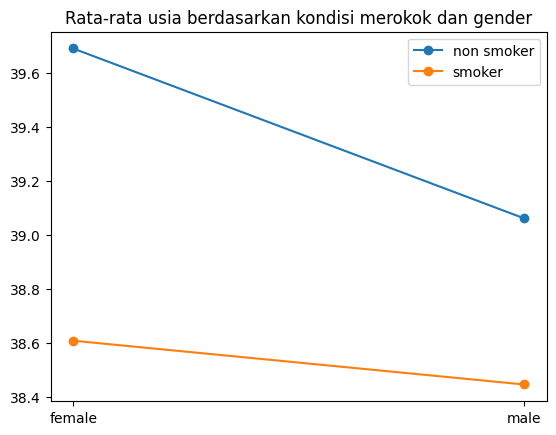

In [59]:
# Plot grafik berdasarkan tabel untuk memudahkan visualisasi

fig, ax = plt.subplots()
ax.plot(smoker_by_sex_age_mean['no'], label='non smoker', marker='o')
ax.plot(smoker_by_sex_age_mean['yes'], label='smoker', marker='o')
ax.legend()
plt.xticks(rotation=0, horizontalalignment="center")
plt.title('Rata-rata usia berdasarkan kondisi merokok dan gender')
plt.show()

Grafik di atas menunjukkan bahwa rata-rata usia wanita selalu lebih tinggi daripada usia pria, baik itu perokok maupun non perokok, di mana wanita perokok rata-rata berusia 38.6 tahun, dan wanita non perokok rata-rata berusia 39.6 tahun.

**BMI perokok berdasarkan gender**

In [60]:
# Kelompokkan data berdasarkan smoker-non smoker, male-female, kemudian dicari rata-rata BMI-nya

smoker_by_sex_bmi_mean = df.groupby(['smoker', 'sex']).bmi.mean()
smoker_by_sex_bmi_mean

smoker  sex   
no      female    30.540585
        male      30.772340
yes     female    29.614783
        male      31.507547
Name: bmi, dtype: float64

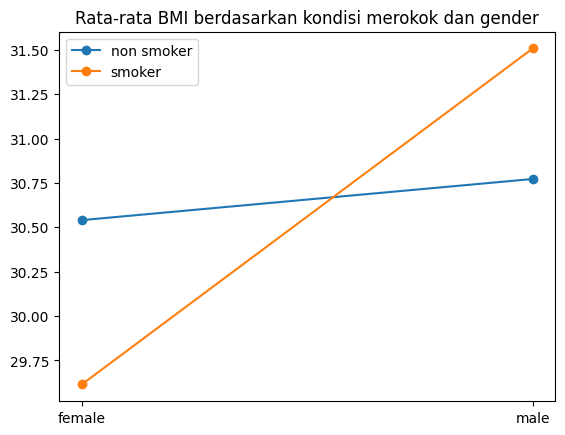

In [61]:
# Plot grafik berdasarkan tabel untuk memudahkan visualisasi

fig, ax = plt.subplots()
ax.plot(smoker_by_sex_bmi_mean['no'], label='non smoker', marker='o')
ax.plot(smoker_by_sex_bmi_mean['yes'], label='smoker', marker='o')
ax.legend()
plt.xticks(rotation=0, horizontalalignment="center")
plt.title('Rata-rata BMI berdasarkan kondisi merokok dan gender')
plt.show()

Grafik di atas menunjukkan rata-rata BMI pria perokok lebih tinggi daripada BMI wanita perokok. Sedangkan untuk pengguna non perokok, wanita dan pria mempunyai BMI yang tidak berbeda jauh.

**Biaya perokok berdasarkan gender**

In [63]:
# Kelompokkan data berdasarkan smoker-non smoker, male-female, kemudian dicari rata-rata biayanya

smoker_by_sex_expenses_mean = df.groupby(['smoker', 'sex']).expenses.mean()
smoker_by_sex_expenses_mean

smoker  sex   
no      female     8762.297367
        male       8087.204971
yes     female    30678.996261
        male      33042.006226
Name: expenses, dtype: float64

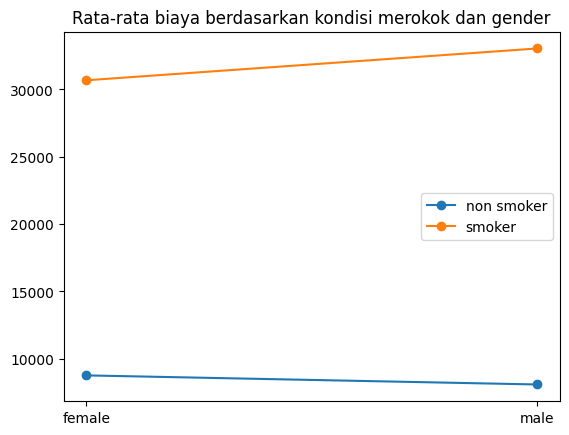

In [64]:
# Plot grafik berdasarkan tabel untuk memudahkan visualisasi

fig, ax = plt.subplots()
ax.plot(smoker_by_sex_expenses_mean['no'], label='non smoker', marker='o')
ax.plot(smoker_by_sex_expenses_mean['yes'], label='smoker', marker='o')
ax.legend()
plt.xticks(rotation=0, horizontalalignment="center")
plt.title('Rata-rata biaya berdasarkan kondisi merokok dan gender')
plt.show()

Grafik di atas menunujukkan perbedaan rata-rata biaya yang sangat jauh antara perokok dan non perokok baik itu pria maupun wanita. Pria perokok mempunyai biaya tagihan 3000USD lebih besar daripada perokok wanita. Sedangkan pengguna non perokok, justru pria non perokok mempunyai tagihan yang sedikit lebih rendah 600USD daripada wanita non perokok.

**Analisis Peluang Fitur**

Proporsi fitur pada tiap region

Setelah mengetahui gambaran umum dari dataset, sesi ini memberikan proporsi fitur-fitur dari masing-masing region sehingga mendapatkan informasi yang jelas apakah tiap region mempunyai pengguna asuransi yang sama atau berbeda karakteristiknya.

In [65]:
# Kategorikan expenses menjadi fitur continue

bins= [0,5000,15000,30000,100000] # first index is excluded, last index is included
labels = [
         'under5k',
         '5k-15k',
         '15k-30k',
         'above30k'
         ]

df['expenses_class']= pd.cut(
   df['expenses'], 
   bins = bins, 
   labels = labels,
   include_lowest = False
   )

In [66]:
# Bagi dataset berdasarkan region dan disimpan dalam variabel sesuai dengan dengan namanya

dfsw = df.query("region == 'southwest'")
dfse = df.query("region == 'southeast'")
dfnw = df.query("region == 'northwest'")
dfne = df.query("region == 'northeast'")

**Sebaran Data Tiap Region**

In [67]:
# Display sebaran kelas usia pada tiap-tiap region

sw_ageclass = dfsw.value_counts(['age_class'], normalize=True)
se_ageclass = dfse.value_counts(['age_class'], normalize=True)
nw_ageclass = dfnw.value_counts(['age_class'], normalize=True)
ne_ageclass = dfne.value_counts(['age_class'], normalize=True)

ageclass_given_regions = pd.DataFrame([sw_ageclass,se_ageclass,nw_ageclass,ne_ageclass],
                                    index=['southwest', 'southeast', 'northwest', 'northeast'])
ageclass_given_regions

age_class,40-60,20-40,~20,60~
southwest,0.415385,0.396923,0.120000,0.067692
southeast,0.403846,0.395604,0.131868,0.068681
northwest,0.400000,0.403077,0.126154,0.070769
northeast,0.413580,0.404321,0.117284,0.064815


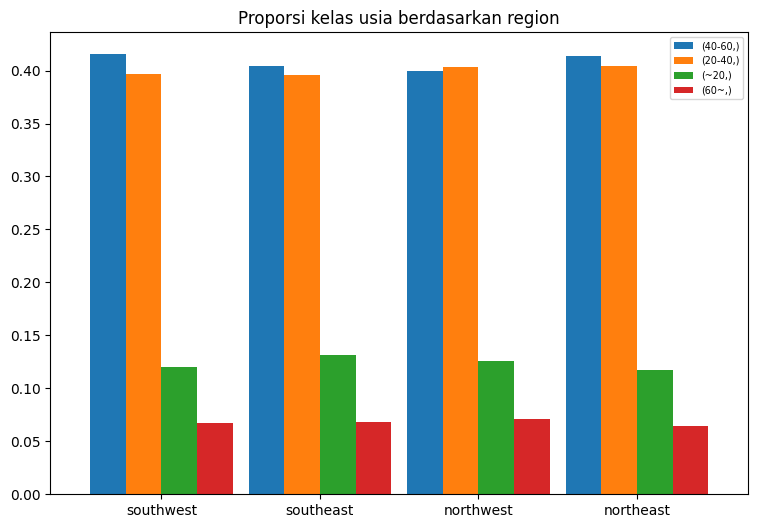

In [68]:
ageclass_given_regions.plot(kind='bar', rot=0, figsize=(9,6), width=0.9)
plt.legend(fontsize='x-small') 
plt.title('Proporsi kelas usia berdasarkan region')
plt.show()

Grafik di atas memperlihatkan proporsi kelas usia dari masing-masing region. Pada kelas usia 40-60 tahun, tiap-tiap region mempunyai proporsi yang hamir sama di kisaran 0.4. berada di urutan kedua, pengguna kelas usia 20-40 tahun pada tiap-tiap region mempunyai proporsi 0.39 untuk Southwest dan Southeast, sedangkan Northwest dan Northeast mempunyai proporsi 0.4. Kelas usia di bawah 20 tahun dan kelas usia di atas 60 tahun, mempunyanyai proporsi yang tidak begitu signifikan perbedaaanya pada tiap region.

In [69]:
# Display sebaran gender pada tiap-tiap region

sw_sex = dfsw.value_counts(['sex'], normalize=True)
se_sex = dfse.value_counts(['sex'], normalize=True)
nw_sex = dfnw.value_counts(['sex'], normalize=True)
ne_sex = dfne.value_counts(['sex'], normalize=True)

sex_given_regions = pd.DataFrame([sw_sex,se_sex,nw_sex,ne_sex],
                                    index=['southwest', 'southeast', 'northwest', 'northeast'])
sex_given_regions

sex,male,female
southwest,0.501538,0.498462
southeast,0.519231,0.480769
northwest,0.495385,0.504615
northeast,0.503086,0.496914


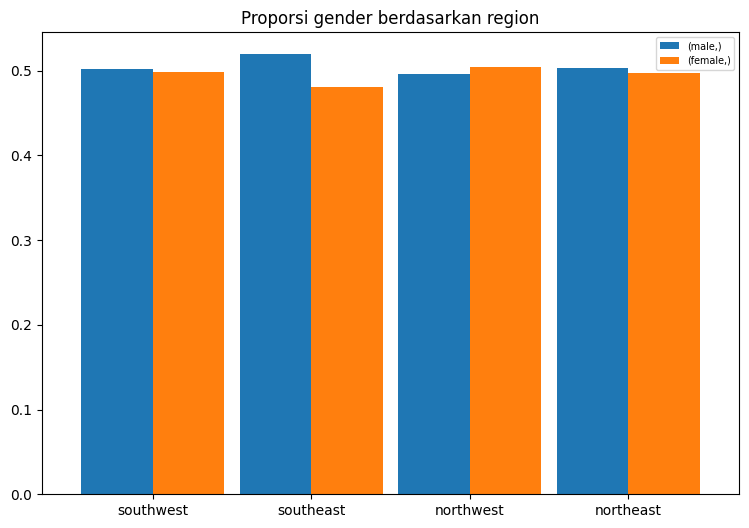

In [70]:
sex_given_regions.plot(kind='bar', rot=0, figsize=(9,6), width=0.9)
plt.legend(fontsize='x-small') 
plt.title('Proporsi gender berdasarkan region')
plt.show()

Untuk proporsi pria dan wanita pada tiap region, hanya Southeast yang perbedaan pria dan wanitanya terlihat sedikit menonjol, yaitu 0.519 pria dan 0.480 wanita. Ketiga region lain saling berbagi proporsi yang sama untuk gender.

In [71]:
# Display sebaran kelas BMI pada tiap-tiap region

sw_bmi = dfsw.value_counts(['bmi_class'], normalize=True)
se_bmi = dfse.value_counts(['bmi_class'], normalize=True)
nw_bmi = dfnw.value_counts(['bmi_class'], normalize=True)
ne_bmi = dfne.value_counts(['bmi_class'], normalize=True)

bmi_given_regions = pd.DataFrame([sw_bmi,se_bmi,nw_bmi,ne_bmi],
                                    index=['southwest', 'southeast', 'northwest', 'northeast'])
bmi_given_regions

bmi_class,obesity,overweight,healthy,underweight
southwest,0.526154,0.310769,0.150769,0.012308
southeast,0.659341,0.228022,0.112637,0.000000
northwest,0.443077,0.341538,0.193846,0.021538
northeast,0.441358,0.302469,0.225309,0.030864


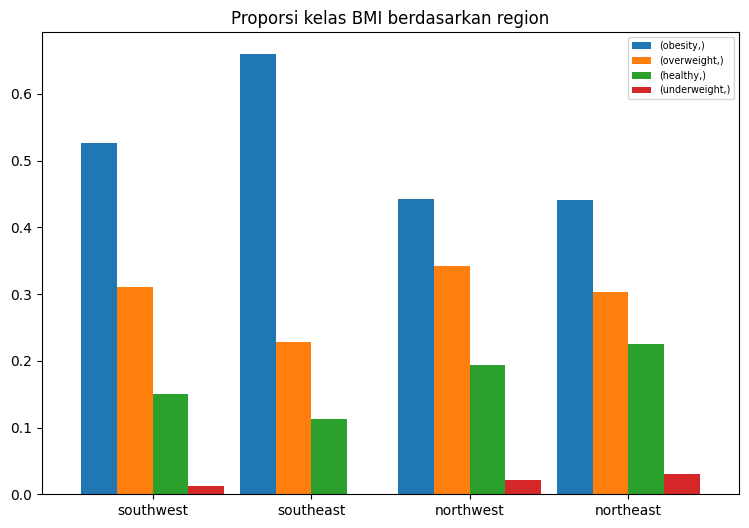

In [72]:
bmi_given_regions.plot(kind='bar', rot=0, figsize=(9,6), width=0.9)
plt.legend(fontsize='x-small') 
plt.title('Proporsi kelas BMI berdasarkan region')
plt.show()

Grafik di atas menunjukkan region Southeast mempunyai pengguna dengan kelas BMI obesity terbanyak dibanding region lain, dengan proporsi 0.66. berada di urutan kedua region Southwest dengan proporsi 0.52. Region Southeast menjadi satu-satunya region yang tidak mempunyai pengguna dengan kelas BMI underweight.

In [73]:
# Display sebaran jumlah anak pada tiap-tiap region

sw_children = dfsw.value_counts(['children'], normalize=True)
se_children = dfse.value_counts(['children'], normalize=True)
nw_children = dfnw.value_counts(['children'], normalize=True)
ne_children = dfne.value_counts(['children'], normalize=True)

children_given_regions = pd.DataFrame([sw_children,se_children,nw_children,ne_children],
                                    index=['southwest', 'southeast', 'northwest', 'northeast'])
children_given_regions

children,0,1,2,3,5,4
southwest,0.424615,0.240000,0.175385,0.113846,0.024615,0.021538
southeast,0.431319,0.260989,0.181319,0.096154,0.016484,0.013736
northwest,0.406154,0.227692,0.203077,0.141538,0.003077,0.018462
northeast,0.453704,0.237654,0.157407,0.120370,0.009259,0.021605


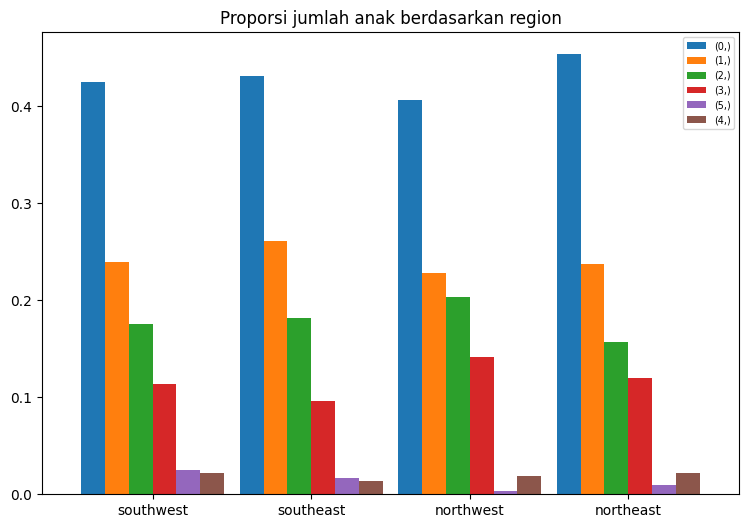

In [74]:
children_given_regions.plot(kind='bar', rot=0, figsize=(9,6), width=0.9)
plt.legend(fontsize='x-small') 
plt.title('Proporsi jumlah anak berdasarkan region')
plt.show()

Grafik di atas menunjukkan proporsi pengguna yang tidak mempunyai anak pada tiap region relatif sama kecuali Northeast yang mempunyai nilai 0.45. Tiap-tiap region juga memperlihatkan bahwa sebagian besar pengguna mempunyai proporsi yang tinggi memiliki jumlah anak di bawah 3.

In [75]:
# Display sebaran kondisi merokok pada tiap-tiap region

sw_smoker = dfsw.value_counts(['smoker'], normalize=True)
se_smoker = dfse.value_counts(['smoker'], normalize=True)
nw_smoker = dfnw.value_counts(['smoker'], normalize=True)
ne_smoker = dfne.value_counts(['smoker'], normalize=True)

smoker_given_regions = pd.DataFrame([sw_smoker,se_smoker,nw_smoker,ne_smoker],
                                    index=['southwest', 'southeast', 'northwest', 'northeast'])
smoker_given_regions

smoker,no,yes
southwest,0.821538,0.178462
southeast,0.750000,0.250000
northwest,0.821538,0.178462
northeast,0.793210,0.206790


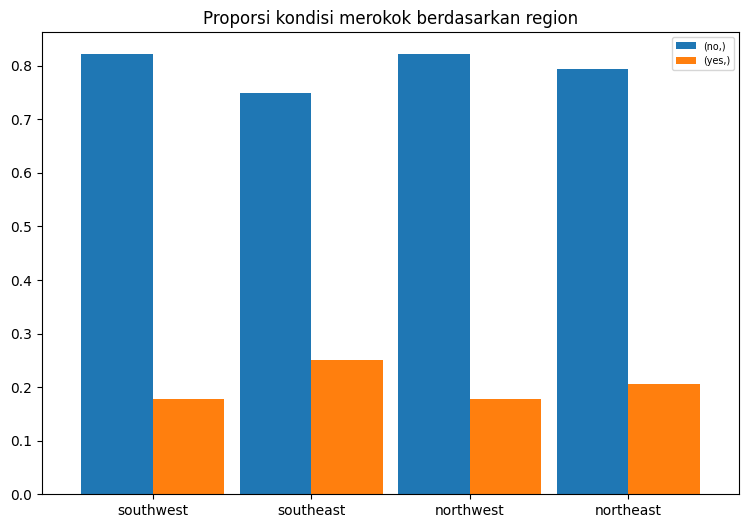

In [76]:
smoker_given_regions.plot(kind='bar', rot=0, figsize=(9,6), width=0.9)
plt.legend(fontsize='x-small') 
plt.title('Proporsi kondisi merokok berdasarkan region')
plt.show()

Untuk proporsi kondisi merokok tiap region, pengguna non perokok mempunyai proporsi yang paling besar pada keempat region, dengan nilai: Southwest 0.82, Southeast 0.75, Northwest 0.82, dan Northeast 0.79. Sedangkan proporsi perokok, region Southeast mempunyai proporsi yang cukup besar dibandingkan ketiga region lain yaitu 0.25.

In [78]:
sw_expenses = dfsw.value_counts(['expenses_class'], normalize=True)
se_expenses = dfse.value_counts(['expenses_class'], normalize=True)
nw_expenses = dfnw.value_counts(['expenses_class'], normalize=True)
ne_expenses = dfne.value_counts(['expenses_class'], normalize=True)

expenses_given_regions = pd.DataFrame([sw_expenses,se_expenses,nw_expenses,ne_expenses],
                                    index=['southwest', 'southeast', 'northwest', 'northeast'])
expenses_given_regions

expenses_class,5k-15k,under5k,above30k,15k-30k
southwest,0.507692,0.270769,0.113846,0.107692
southeast,0.392857,0.288462,0.167582,0.151099
northwest,0.483077,0.267692,0.089231,0.160000
northeast,0.481481,0.243827,0.108025,0.166667


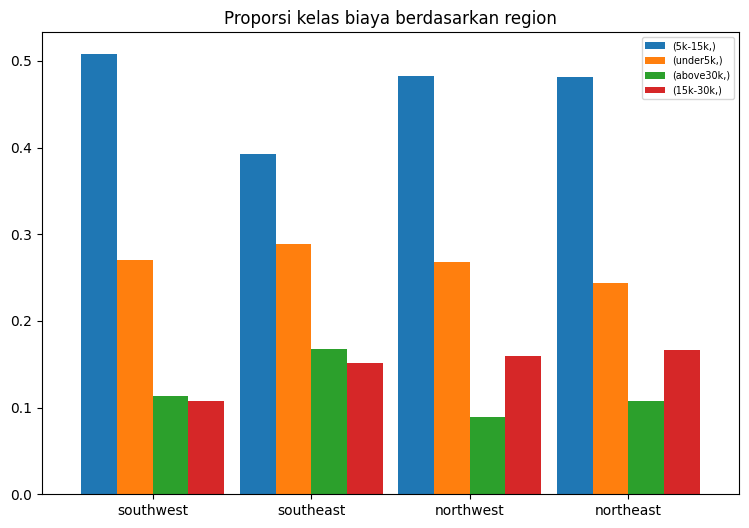

In [79]:
expenses_given_regions.plot(kind='bar', rot=0, figsize=(9,6), width=0.9)
plt.legend(fontsize='x-small') 
plt.title('Proporsi kelas biaya berdasarkan region')
plt.show()

Grafik di atas menunjukkan proporsi biaya 5,000-15,000 menduduki peringkat pertama pada tiap region. Pada urutan kedua kelas biaya di bawah 5,000 terdistribusi 0.2 pada keempat region. Kelas biaya 15,000-30,000 menduduki urutan ketiga di Northwest dan Northeast dengan nilai 0.16. Pada region Southwest dan Southeast, kelas biaya di atas 30,000 mempunyai proporsi yang lebih besar daripada kelas biaya gold.

Untuk masing-masing region, dapat disimpulkan bahwa proporsi fitur-fitur pengguna asuransi tidak melenceng dari keseluruhan nilai rata-rata dataset yang telah dibahas di bagian pertama.

*   Kelas usia 40-60 tahun mempunyai proporsi terbesar kecuali di Northwest, yang proporsi terbesarnya adalah kelas usia 20-40 tahun.
*   Gender pengguna relatif sama pada tiap region kecuali Southeast yang proporsinya 0.519 pria dan 0.480 wanita.
*   Pada keempat region, pengguna yang masuk kategori kelas BMI obesity mempunyai peluang terbesar, diikuti overweigt, healthy, dan underweight di urutan terakhir.
*   Pengguna yang tidak memiliki anak dan memiliki jumlah anak di bawah 3 mempunyai proporsi yang besar pada tiap region, mencapai kisaran 85%.
*   Pengguna perokok hanya mempunyai porsi 0.25 di Southeast dan dan 0.20 di Northeast. Sedangkan di Southwest dan Northwest 0.17.
*   Proporsi kelas biaya pengguna terbesar ada di rentang 5,000-15,0000.


**Peluang fitur-fitur pada region Southwest**

In [80]:
# Peluang male/female diketahui age class (index)

P_gender_given_ageclass = pd.crosstab(dfsw['age_class'], dfsw['sex'], normalize='index') 
P_gender_given_ageclass

sex,female,male
age_class,,
~20,0.487179,0.512821
20-40,0.496124,0.503876
40-60,0.496296,0.503704
60~,0.545455,0.454545


Pada region Southwest, jika diketahui pengguna berada di kelas usia selain 60 tahun ke atas, maka peluang pengguna tersebut pria berkisar 0.5 dan peluang pengguna tersebut wanita berkisar 0.49. Dengan kata lain peluang pria selalu lebih besar daripada wanita. Lain halnya pada kelas usia 60 tahun ke atas, peluang wanita sedikit lebih besar daripada pria, yaitu 0.54 untuk peluang wanita, dan 0.45 untuk peluang pria.

In [81]:
# Peluang bmi class diketahui age class (index)

P_bmi_given_ageclass = pd.crosstab(dfsw['age_class'], dfsw['bmi_class'], normalize='index') 
P_bmi_given_ageclass

bmi_class,underweight,healthy,overweight,obesity
age_class,,,,
~20,0.025641,0.307692,0.307692,0.358974
20-40,0.023256,0.155039,0.310078,0.511628
40-60,0.000000,0.111111,0.348148,0.540741
60~,0.000000,0.090909,0.090909,0.818182


Peluang pengguna masuk kategori obesity jika diketahui kelas usia di atas 60 tahun sangat besar, yaitu 0.8. Untuk kelas usia 20-40 tahun dan 40-60 tahun, peluang pengguna obesity tidak kurang dari 0.5. Hanya di kelas usia di bawah 20 tahun pengguna yang masuk kelas bmi obesity mempunyai peluang 0.35.

In [82]:
# Peluang children diketahui age class (index)

P_children_given_ageclass = pd.crosstab(dfsw['age_class'], dfsw['children'], normalize='index') 
P_children_given_ageclass

children,0,1,2,3,4,5
age_class,,,,,,
~20,0.717949,0.153846,0.076923,0.000000,0.000000,0.051282
20-40,0.348837,0.232558,0.193798,0.147287,0.046512,0.031008
40-60,0.377778,0.296296,0.185185,0.118519,0.007407,0.014815
60~,0.636364,0.090909,0.181818,0.090909,0.000000,0.000000


Jika diketahui kelas usia di bawah 20 tahun dan di atas 60 tahun, peluang pengguna dengan jumlah anak 0 lebih dari 0.5. sedangkan jika diketahui kelas usia 20-40 tahun dan 40-60 tahun, peluang pengguna dengan jumlah anak 0 kurang dari 0.5.

In [83]:
# Peluang smoker diketahui age class (index)

P_smoker_given_ageclass = pd.crosstab(dfsw['age_class'], dfsw['smoker'], normalize='index') 
P_smoker_given_ageclass

smoker,no,yes
age_class,,
~20,0.743590,0.256410
20-40,0.775194,0.224806
40-60,0.896296,0.103704
60~,0.772727,0.227273


Peluang pengguna perokok jika diketahui kelas usia tertinggi ada di kelas usia di bawah 20 tahun dengan nilai peluang 0.256, diikuti kelas usia di atas 60 tahun dnegan nilai peluang 0.227 dan kelas usia 20-40 tahun dengan nilai peluang 0.224. Pelaung pengguna perokok terendah jika diketahui kelas usia, berada di kelas usia 40-60 tahun dengan nilai 0.103.

In [85]:
# Peluang charges class diketahui age class (index)

P_expensesclass_given_ageclass = pd.crosstab(dfsw['age_class'], dfsw['expenses_class'], normalize='index') 
P_expensesclass_given_ageclass

expenses_class,under5k,5k-15k,15k-30k,above30k
age_class,,,,
~20,0.717949,0.025641,0.153846,0.102564
20-40,0.465116,0.279070,0.108527,0.147287
40-60,0.000000,0.837037,0.096296,0.066667
60~,0.000000,0.681818,0.090909,0.227273


Jika diketahui kelas usia 40-60 tahun, maka peluang pengguna berada di kelas biaya silver adalah 0.83. Peluang pengguna berbiaya silver jika diketahui kelas usia di atas 60 tahun bernilai 0.68. Jika diketahui kelas usia keduanya, maka tidak ada peluang dari keduanya berada di kelas biaya standard.

In [86]:
# Peluang age class diketahui sex (index)

P_ageclass_given_sex = pd.crosstab(dfsw['sex'], dfsw['age_class'], normalize='index') 
P_ageclass_given_sex

age_class,~20,20-40,40-60,60~
sex,,,,
female,0.117284,0.395062,0.413580,0.074074
male,0.122699,0.398773,0.417178,0.061350


Jika diketahui pengguna adalah pria ataupun wanita, maka pengguna berpeluang 0.41 berada di kelas usia 40-60 tahun, berpeluang 0.39 berada di kelas usia 20-40 tahun, berpeluang 0.1 berada di kelas usia di bawah 20 tahun, dan sisanya berpeluang berada di kelas usia di atas 60 tahun.

In [87]:
# Peluang bmi class diketahui sex (index)

P_bmiclass_given_sex = pd.crosstab(dfsw['sex'], dfsw['bmi_class'], normalize='index') 
P_bmiclass_given_sex

bmi_class,underweight,healthy,overweight,obesity
sex,,,,
female,0.024691,0.154321,0.339506,0.481481
male,0.000000,0.147239,0.282209,0.570552


Peluang pengguna obesity bernilai 0.57 bila diketahui pria. Sedangkan bila diketahui wanita, peluangnya 0.48. Pengguna underweight tidak berpeluang sama sekali jika diketahui pengguna adalah pria.

In [88]:
# Peluang children diketahui sex (index)

P_children_given_sex = pd.crosstab(dfsw['sex'], dfsw['children'], normalize='index') 
P_children_given_sex

children,0,1,2,3,4,5
sex,,,,,,
female,0.425926,0.240741,0.185185,0.104938,0.018519,0.024691
male,0.423313,0.239264,0.165644,0.122699,0.024540,0.024540


Jika gender diketahui, baik itu pria atau wanita, peluang pengguna memiliki jumlah anak 0 adalah 0.42. Nilai peluang ini paling tinggi dibandingkan dengan jumlah anak lainnya.

In [89]:
# Peluang smoker diketahui sex (index)

P_smoker_given_sex = pd.crosstab(dfsw['sex'], dfsw['smoker'], normalize='index') 
P_smoker_given_sex

smoker,no,yes
sex,,
female,0.870370,0.129630
male,0.773006,0.226994


Jika diketahui pengguna adalah pria, maka peluang pengguna perokok adalah 0.22. Sedangkan bila diketahui penggguna adalah wanita, maka peluang pengguna perokok adalah 0.12.

In [90]:
# Peluang expenses class diketahui sex (index)

P_expensesclass_given_sex = pd.crosstab(dfsw['sex'], dfsw['expenses_class'], normalize='index') 
P_expensesclass_given_sex

expenses_class,under5k,5k-15k,15k-30k,above30k
sex,,,,
female,0.265432,0.567901,0.080247,0.086420
male,0.276074,0.447853,0.134969,0.141104


Jka gender diketahui wanita, maka pelaung pengguna dari kelas biaya silver    (5,000-15000) bernilai lebih dari 50%. Sisanya berpeluang dari kelas biaya standar, platinum, dan gold. Jika gender diketahui pria, urutan peluang tertinggi sampai terendah mengikuti gender wanita, hanya proporsinya yang sedikit berbeda. Peluang kelas biaya silver bernilai 0.44, standard 0.27, platinum 0.14, dan gold 0.13.

In [91]:
# Peluang age class diketahui bmi class (index)

P_ageclass_given_bmiclass = pd.crosstab(dfsw['bmi_class'], dfsw['age_class'], normalize='index') 
P_ageclass_given_bmiclass

age_class,~20,20-40,40-60,60~
bmi_class,,,,
underweight,0.250000,0.750000,0.000000,0.000000
healthy,0.244898,0.408163,0.306122,0.040816
overweight,0.118812,0.396040,0.465347,0.019802
obesity,0.081871,0.385965,0.426901,0.105263


Jika diketahui BMI pengguna, peluang pengguna tersebut berada di rentang usia 40 tahun ke atas adalah 0. Berkebalikan dengannya, peluang pengguna berada di rentang usia 20-40 tahun adalah 0.75, dan peluang usia di bawah 20 tahun 0.25. Peluang pengguna usia dibawah 20 tahun jika diketahui obesity sangat kecil yaitu 0.08. Begitu juga peluang pengguna usia 60 tahun ke atas diketahui healthy, yang bernilai hanya 0.04.

In [92]:
# Peluang sex diketahui bmi class (index)

P_sex_given_bmiclass = pd.crosstab(dfsw['bmi_class'], dfsw['sex'], normalize='index') 
P_sex_given_bmiclass

sex,female,male
bmi_class,,
underweight,1.000000,0.000000
healthy,0.510204,0.489796
overweight,0.544554,0.455446
obesity,0.456140,0.543860


Jika diketahui underweight, maka bisa dipastikan pengguna tersebut adalah seorang wanita. Jika diketahui kelas bmi healthy dan overweight, peluang pria selalu lebih kecil dari wanita. Sedangkan jka diketahui obesity, justru peluang pria (0.54) lebih besar daripada peluang wanita (0.45).

In [93]:
# Peluang children diketahui bmi class (index)

P_children_given_bmiclass = pd.crosstab(dfsw['bmi_class'], dfsw['children'], normalize='index') 
P_children_given_bmiclass

children,0,1,2,3,4,5
bmi_class,,,,,,
underweight,0.250000,0.500000,0.000000,0.000000,0.000000,0.250000
healthy,0.510204,0.265306,0.122449,0.061224,0.000000,0.040816
overweight,0.425743,0.247525,0.138614,0.118812,0.049505,0.019802
obesity,0.403509,0.222222,0.216374,0.128655,0.011696,0.017544


Jika diketahui pengguna underweight, maka pengguna setengah dari pengguna tersebut dengan jumlah anak 1, seperempat dengan jumlah anak 0 dan seperempat memiliki jumlah anak 5. Jika diketahui kelas BMI lain, peluang pengguna dengan jumlah anak 0 mempunyai peluang tertinggi daripada pengguna dengan jumlah anak selain 0.

In [94]:
# Peluang smoker diketahui bmi class (index)

P_smoker_given_bmiclass = pd.crosstab(dfsw['bmi_class'], dfsw['smoker'], normalize='index') 
P_smoker_given_bmiclass

smoker,no,yes
bmi_class,,
underweight,0.750000,0.250000
healthy,0.877551,0.122449
overweight,0.831683,0.168317
obesity,0.801170,0.198830


Peluang pengguna perokok jika diketahui BMI kelas underweight adalah 0.25, yang merupakan peluang terbesar dari kelas BMI lainnya.

In [96]:
# Peluang expenses class diketahui bmi class (index)

P_expensesclass_given_bmiclass = pd.crosstab(dfsw['bmi_class'], dfsw['expenses_class'], normalize='index') 
P_expensesclass_given_bmiclass

expenses_class,under5k,5k-15k,15k-30k,above30k
bmi_class,,,,
underweight,0.750000,0.000000,0.250000,0.000000
healthy,0.489796,0.387755,0.122449,0.000000
overweight,0.227723,0.524752,0.227723,0.019802
obesity,0.222222,0.543860,0.029240,0.204678


Jika diketahui kelas BMI underweight, maka peluang pengguna tersebut berada di kelas biaya standard adalah 0.75 dan berada di kelas gold adalah 0.25. Jika diketahui kelas BMI healthy, maka peluang penggguna berada di kelas biaya platinum adalah 0. Peluang pengguna dengan kelas biaya silver bernilai di kisaran 0.5 jika diketahui BMI overweight dan obesity.

In [97]:
# Peluang age class diketahui children (index)

P_ageclass_given_children = pd.crosstab(dfsw['children'], dfsw['age_class'], normalize='index') 
P_ageclass_given_children

age_class,~20,20-40,40-60,60~
children,,,,
0,0.202899,0.326087,0.369565,0.101449
1,0.076923,0.384615,0.512821,0.025641
2,0.052632,0.438596,0.438596,0.070175
3,0.000000,0.513514,0.432432,0.054054
4,0.000000,0.857143,0.142857,0.000000
5,0.250000,0.500000,0.250000,0.000000


Peluang pengguna ada di kelas usia 20-40 tahun jika diketahui jumlah anak 4 adalah 0.85, sedangkan peluang pengguna bernilai 0.5 di kelas usia yang sama jika diketahui jumlah anak 5. Peluang pengguna usia di bawah 20 tahun jika diketahui jumlah anak 3 dan 4 bernilai 0. Sama halnya dengan peluang pengguna usia di atas 60 tahun jika diketahui jumlah anak 4 dan 5.

In [98]:
# Peluang sex diketahui children (index)

P_sex_given_children = pd.crosstab(dfsw['children'], dfsw['sex'], normalize='index') 
P_sex_given_children

sex,female,male
children,,
0,0.500000,0.500000
1,0.500000,0.500000
2,0.526316,0.473684
3,0.459459,0.540541
4,0.428571,0.571429
5,0.500000,0.500000


Peluang bahwa pengguna memiliki jumlah anak 0, 1, atau 5 adalah pria sama besarnya dengan peluang pengguna adalah wanita. Jika diketahui pengguna dengan jumlah anak 2, maka peluang wanita lebih besar daripada pria. Sedangkan jika diketahui jumlah anak 3 atau 4, maka peluang pengguna tersebut pria lebih besar daripada wanita.

In [99]:
# Peluang bmi class diketahui children (index)

P_bmiclass_given_children = pd.crosstab(dfsw['children'], dfsw['bmi_class'], normalize='index') 
P_bmiclass_given_children

bmi_class,underweight,healthy,overweight,obesity
children,,,,
0,0.007246,0.181159,0.311594,0.500000
1,0.025641,0.166667,0.320513,0.487179
2,0.000000,0.105263,0.245614,0.649123
3,0.000000,0.081081,0.324324,0.594595
4,0.000000,0.000000,0.714286,0.285714
5,0.125000,0.250000,0.250000,0.375000


Jika diketahui pengguna dengan jumlah anak 0 sampai 5, peluang BMI pengguna berbanding lurus dengan nilai BMI-nya. Misalnya, pengguna dengan jumlah anak 2, berpeluang 0 underweight, berpeluang 0.10 healthy, berpeluang 0.24 overweight, dan berpeluang 0.64 obesity.

In [100]:
# Peluang smoker class diketahui children (index)

P_smoker_given_children = pd.crosstab(dfsw['children'], dfsw['smoker'], normalize='index') 
P_smoker_given_children

smoker,no,yes
children,,
0,0.818841,0.181159
1,0.897436,0.102564
2,0.701754,0.298246
3,0.864865,0.135135
4,0.714286,0.285714
5,0.875000,0.125000


Jika diketahui jumlah anak pengguna, peluang pengguna tersebut bukanlah perokok sangat besar di masing-masing jumlah anak. Pada jumlah anak 2 peluang pengguna perokok hanya 0.29 dan di jumlah anak 4, peluang pengguna perokok hanya 0.28

In [101]:
# Peluang expenses class diketahui children (index)

P_expensesclass_given_children = pd.crosstab(dfsw['children'], dfsw['expenses_class'], normalize='index') 
P_expensesclass_given_children

expenses_class,under5k,5k-15k,15k-30k,above30k
children,,,,
0,0.333333,0.442029,0.108696,0.115942
1,0.307692,0.551282,0.076923,0.064103
2,0.157895,0.508772,0.070175,0.263158
3,0.189189,0.621622,0.189189,0.000000
4,0.000000,0.571429,0.285714,0.142857
5,0.250000,0.625000,0.125000,0.000000


Peluang bahwa pengguna tersebut mempunyai jumlah anak 0 sampai 5 masuk kategori kelas biaya silver bernilai paling tinggi dibandingkan peluang kelas biaya lainnya. Di mana pada jumlah anak 0 peluangnya 0.44, jumlah anak 1 peluangnya 0.55, jumlah anak 2 peluangnya 0.50, jumlah anak 3 peluangnya 0.62, jumlah anak 4 peluangnya 0.57, dan pada jumlah anak 5 peluangnya 0.62.

In [102]:
# Peluang age class diketahui smoker (index)

P_ageclass_given_smoker = pd.crosstab(dfsw['smoker'], dfsw['age_class'], normalize='index') 
P_ageclass_given_smoker

age_class,~20,20-40,40-60,60~
smoker,,,,
no,0.108614,0.374532,0.453184,0.063670
yes,0.172414,0.500000,0.241379,0.086207


In [103]:
# Peluang sex diketahui smoker (index)

P_sex_given_smoker = pd.crosstab(dfsw['smoker'], dfsw['sex'], normalize='index') 
P_sex_given_smoker

sex,female,male
smoker,,
no,0.528090,0.471910
yes,0.362069,0.637931


Peluang bahwa pengguna non perokok adalah wanita bernilai 0.52, sedangkan peluang bahwa pengguna non perokok adalah pria bernilai 0.47. Jika diketahui pengguna adalah perokok, peluang pria lebih besar daripada wanita yaitu 0.63 berbanding 0.36.

In [104]:
# Peluang bmi class diketahui smoker (index)

P_bmiclass_given_smoker = pd.crosstab(dfsw['smoker'], dfsw['bmi_class'], normalize='index') 
P_bmiclass_given_smoker

bmi_class,underweight,healthy,overweight,obesity
smoker,,,,
no,0.011236,0.161049,0.314607,0.513109
yes,0.017241,0.103448,0.293103,0.586207


Jika diketahui pengguna perokok ataupun non perokok, peluang pengguna termasuk kelas BMI obesity di atas 50%. Sisanya sesuai urutan berada di overweight, healthy, dan terakhir underweight.

In [105]:
# Peluang children diketahui smoker (index)

P_children_given_smoker = pd.crosstab(dfsw['smoker'], dfsw['children'], normalize='index') 
P_children_given_smoker

children,0,1,2,3,4,5
smoker,,,,,,
no,0.423221,0.262172,0.149813,0.119850,0.018727,0.026217
yes,0.431034,0.137931,0.293103,0.086207,0.034483,0.017241


Peluang bahwa pengguna perokok atau non perokok adalah pengguna dengan jumlah anak 0 bernilai di kisaran 0.4. Peluang pengguna dengan jumlah anak 5 sangat kecil jika diketahui baik itu perokok atau non perokok.

In [106]:
# Peluang expenses class diketahui smoker (index)

P_expensesclass_given_smoker = pd.crosstab(dfsw['smoker'], dfsw['expenses_class'], normalize='index') 
P_expensesclass_given_smoker

expenses_class,under5k,5k-15k,15k-30k,above30k
smoker,,,,
no,0.329588,0.614232,0.048689,0.007491
yes,0.000000,0.017241,0.379310,0.603448


Jika diketahui pengguna adalah perokok, peluang untuk berada di kelas biaya platinum adalah 0.6, gold 0.3, silver 0.01, dan tidak berpeluang sama sekali berada di kelas standard.

In [107]:
# Peluang age class diketahui expenses class (index)

P_ageclass_given_expensesclass= pd.crosstab(dfsw['expenses_class'], dfsw['age_class'], normalize='index') 
P_ageclass_given_expensesclass

age_class,~20,20-40,40-60,60~
expenses_class,,,,
under5k,0.318182,0.681818,0.000000,0.000000
5k-15k,0.006061,0.218182,0.684848,0.090909
15k-30k,0.171429,0.400000,0.371429,0.057143
above30k,0.108108,0.513514,0.243243,0.135135


Peluang pengguna berusia di atas 40 tahun jika diketahui kelas biaya standard adalah 0, pengguna berpeluang 0.68 berada di kelas usia 20-40 tahun dan 0.31 di kelas usia di bawah 20 tahun.

In [108]:
# Peluang sex diketahui expenses class (index)

P_sex_given_expensesclass= pd.crosstab(dfsw['expenses_class'], dfsw['sex'], normalize='index') 
P_sex_given_expensesclass

sex,female,male
expenses_class,,
under5k,0.488636,0.511364
5k-15k,0.557576,0.442424
15k-30k,0.371429,0.628571
above30k,0.378378,0.621622


Peluang bahwa pengguna berada di kelas biaya standard adalah pria bernilai 0.51, wanita 0.48. Jika diketahui kelas biayanya adalah gold atau platinum, maka peluang pria menjadi 0.62 dan wanita 0.37.

In [109]:
# Peluang bmi class diketahui expenses class (index)

P_bmiclass_given_expensesclass= pd.crosstab(dfsw['expenses_class'], dfsw['bmi_class'], normalize='index') 
P_bmiclass_given_expensesclass

bmi_class,underweight,healthy,overweight,obesity
expenses_class,,,,
under5k,0.034091,0.272727,0.261364,0.431818
5k-15k,0.000000,0.115152,0.321212,0.563636
15k-30k,0.028571,0.171429,0.657143,0.142857
above30k,0.000000,0.000000,0.054054,0.945946


Peluang pengguna underweight jika diketahui kelas biaya silver atau platinum bernilai 0. Peluang pengguna obesity jika diketahui kelas biaya platinum sangat besar, yaitu 0.94.

In [110]:
# Peluang children diketahui expenses class (index)

P_children_given_expensesclass= pd.crosstab(dfsw['expenses_class'], dfsw['children'], normalize='index') 
P_children_given_expensesclass

children,0,1,2,3,4,5
expenses_class,,,,,,
under5k,0.522727,0.272727,0.102273,0.079545,0.000000,0.022727
5k-15k,0.369697,0.260606,0.175758,0.139394,0.024242,0.030303
15k-30k,0.428571,0.171429,0.114286,0.200000,0.057143,0.028571
above30k,0.432432,0.135135,0.405405,0.000000,0.027027,0.000000


Peluang bahwa pengguna ada di kelas standard adalah pengguna dengan jumlah anak 0 bernilai 0.52.

In [111]:
# Peluang smoker diketahui expenses class (index)

P_smoker_given_expensesclass= pd.crosstab(dfsw['expenses_class'], dfsw['smoker'], normalize='index') 
P_smoker_given_expensesclass

smoker,no,yes
expenses_class,,
under5k,1.000000,0.000000
5k-15k,0.993939,0.006061
15k-30k,0.371429,0.628571
above30k,0.054054,0.945946


Peluang bahwa pengguna dengan kelas biaya standard adalah non perokok bernilai 1. Artinya tidak ada perokok sama sekali di kelas biaya tersebut. Sebaliknya, peluang bahwa pengguna dengan kelas biaya platinum adalah perokok bernilai 0.94. Artinya hampir semua anggota kelas biaya tersebut adalah perokok.


**Peluang kelas biaya diketahui fitur lain tiap region**

In [113]:
# Peluang kelas biaya diketahui jumlah anak

P_expensesclassSW_given_children = pd.crosstab(dfsw['children'], dfsw['expenses_class'], normalize='index') 
P_expensesclassSE_given_children = pd.crosstab(dfse['children'], dfse['expenses_class'], normalize='index')
P_expensesclassNW_given_children = pd.crosstab(dfnw['children'], dfnw['expenses_class'], normalize='index') 
P_expensesclassNE_given_children = pd.crosstab(dfne['children'], dfne['expenses_class'], normalize='index')

P_expensesclass_given_children_all = (pd.concat([P_expensesclassSW_given_children, P_expensesclassSE_given_children, 
P_expensesclassNW_given_children, P_expensesclassNE_given_children], keys=['southwest', 'southeast', 'northwest', 'northeast']))
P_expensesclass_given_children_all

expenses_class       under5k    5k-15k   15k-30k  above30k
          children                                        
southwest 0         0.333333  0.442029  0.108696  0.115942
          1         0.307692  0.551282  0.076923  0.064103
          2         0.157895  0.508772  0.070175  0.263158
          3         0.189189  0.621622  0.189189  0.000000
          4         0.000000  0.571429  0.285714  0.142857
          5         0.250000  0.625000  0.125000  0.000000
southeast 0         0.375796  0.312102  0.146497  0.165605
          1         0.273684  0.421053  0.168421  0.136842
          2         0.257576  0.439394  0.090909  0.212121
          3         0.057143  0.457143  0.285714  0.200000
          4         0.200000  0.600000  0.000000  0.200000
          5         0.000000  1.000000  0.000000  0.000000
northwest 0         0.363636  0.424242  0.143939  0.068182
          1         0.310811  0.513514  0.135135  0.040541
          2         0.181818  0.515152  0.196970  0.106061
          3         0.065217  0.521739  0.195652  0.217391
          4         0.166667  0.666667  0.166667  0.000000
          5         0.000000  1.000000  0.000000  0.000000
northeast 0         0.367347  0.428571  0.115646  0.088435
          1         0.129870  0.493506  0.207792  0.168831
          2         0.137255  0.529412  0.274510  0.058824
          3         0.153846  0.589744  0.102564  0.153846
          4         0.142857  0.428571  0.428571  0.000000
          5         0.333333  0.666667  0.000000  0.000000

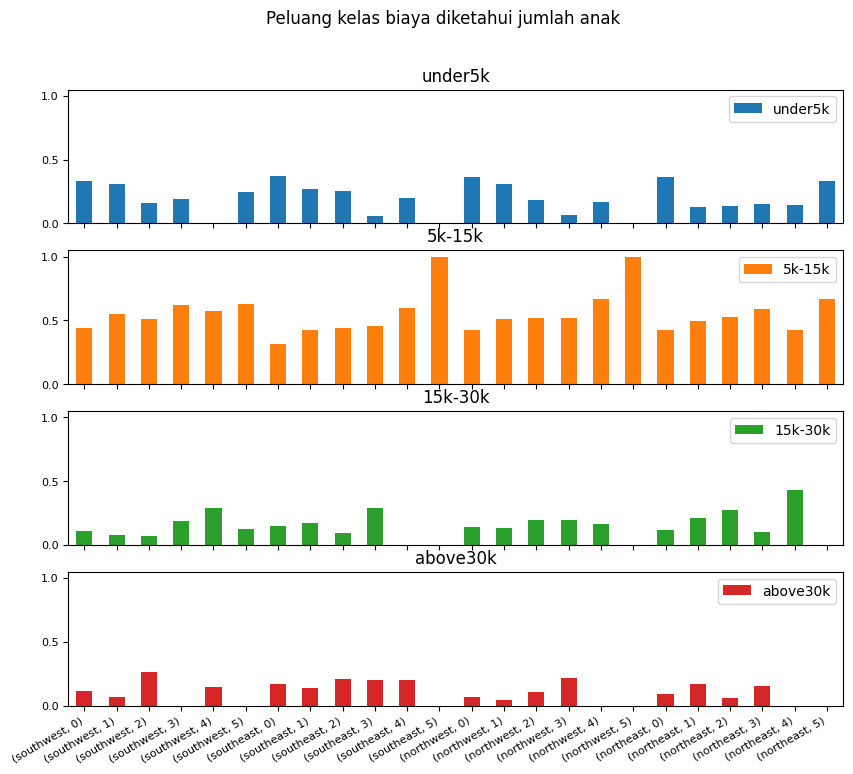

In [114]:
P_expensesclass_given_children_all.plot(kind='bar', figsize=(10,8), rot=30, subplots=True, sharey=True, fontsize=8) 
plt.xlabel('')
plt.xticks(rotation=30, horizontalalignment='right')
plt.suptitle('Peluang kelas biaya diketahui jumlah anak')
plt.show()

In [115]:
# Peluang kelas biaya diketahui gender

P_expensesclassSW_given_sex = pd.crosstab(dfsw['sex'], dfsw['expenses_class'], normalize='index') 
P_expensesclassSE_given_sex = pd.crosstab(dfse['sex'], dfse['expenses_class'], normalize='index')
P_expensesclassNW_given_sex = pd.crosstab(dfnw['sex'], dfnw['expenses_class'], normalize='index') 
P_expensesclassNE_given_sex = pd.crosstab(dfne['sex'], dfne['expenses_class'], normalize='index')

P_expensesclass_given_sex_all = (pd.concat([P_expensesclassSW_given_sex, P_expensesclassSE_given_sex, 
P_expensesclassNW_given_sex, P_expensesclassNE_given_sex], keys=['southwest', 'southeast', 'northwest', 'northeast']))
P_expensesclass_given_sex_all

expenses_class     under5k    5k-15k   15k-30k  above30k
          sex                                           
southwest female  0.265432  0.567901  0.080247  0.086420
          male    0.276074  0.447853  0.134969  0.141104
southeast female  0.291429  0.422857  0.165714  0.120000
          male    0.285714  0.365079  0.137566  0.211640
northwest female  0.256098  0.506098  0.158537  0.079268
          male    0.279503  0.459627  0.161491  0.099379
northeast female  0.229814  0.503106  0.198758  0.068323
          male    0.257669  0.460123  0.134969  0.147239

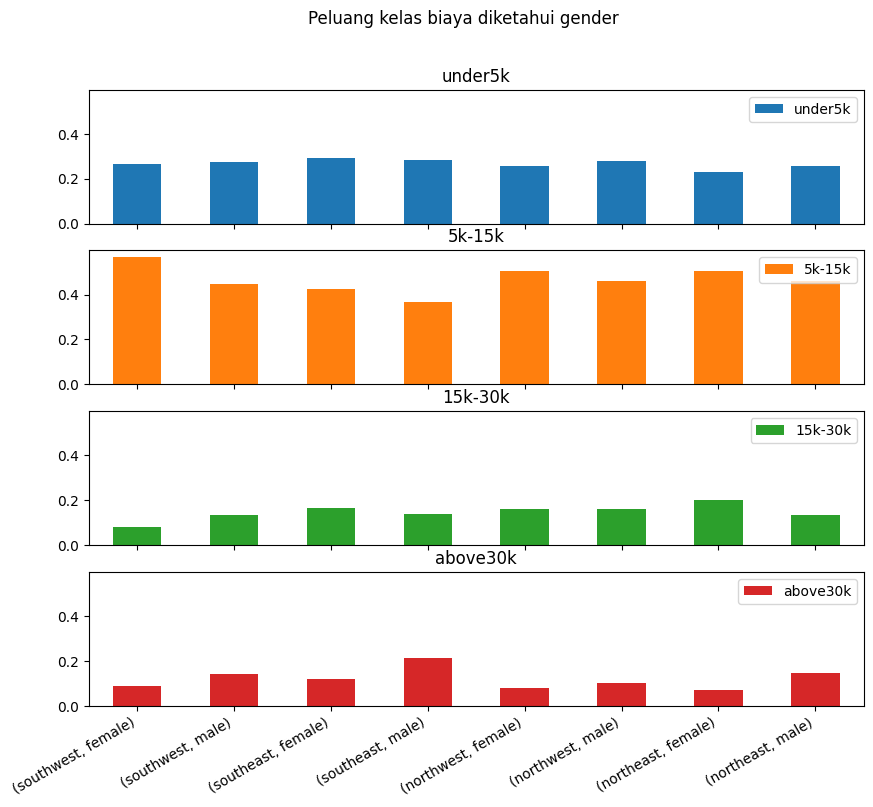

In [116]:
P_expensesclass_given_sex_all.plot(kind='bar', figsize=(10,8), rot=30, subplots=True, sharey=True) 
plt.xlabel('')
plt.xticks(rotation=30, horizontalalignment='right')
plt.suptitle('Peluang kelas biaya diketahui gender')
plt.show()

In [118]:
# Peluang kelas biaya diketahui kondisi merokok

P_expensesclassSW_given_smoker = pd.crosstab(dfsw['smoker'], dfsw['expenses_class'], normalize='index') 
P_expensesclassSE_given_smoker = pd.crosstab(dfse['smoker'], dfse['expenses_class'], normalize='index')
P_expensesclassNW_given_smoker = pd.crosstab(dfnw['smoker'], dfnw['expenses_class'], normalize='index') 
P_expensesclassNE_given_smoker = pd.crosstab(dfne['smoker'], dfne['expenses_class'], normalize='index')

P_expensesclass_given_smoker_all = (pd.concat([P_expensesclassSW_given_smoker, P_expensesclassSE_given_smoker, 
P_expensesclassNW_given_smoker, P_expensesclassNE_given_smoker], keys=['southwest', 'southeast', 'northwest', 'northeast']))
P_expensesclass_given_smoker_all

expenses_class     under5k    5k-15k   15k-30k  above30k
          smoker                                        
southwest no      0.329588  0.614232  0.048689  0.007491
          yes     0.000000  0.017241  0.379310  0.603448
southeast no      0.384615  0.523810  0.087912  0.003663
          yes     0.000000  0.000000  0.340659  0.659341
northwest no      0.325843  0.584270  0.074906  0.014981
          yes     0.000000  0.017241  0.551724  0.431034
northeast no      0.307393  0.587549  0.093385  0.011673
          yes     0.000000  0.074627  0.447761  0.477612

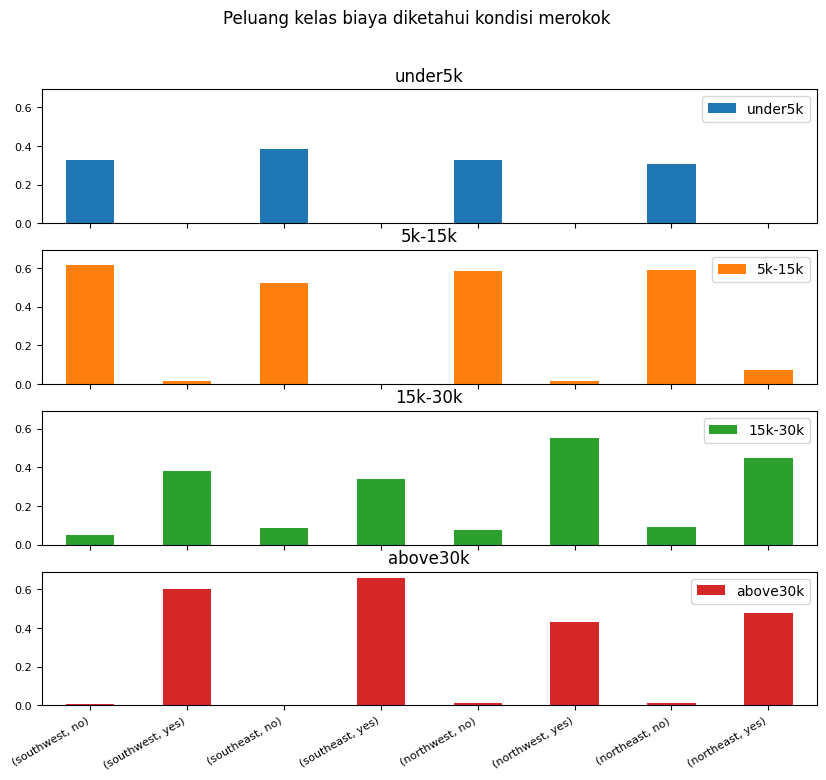

In [119]:
P_expensesclass_given_smoker_all.plot(kind='bar', figsize=(10,8), rot=30, subplots=True, sharey=True, fontsize=8) 
plt.xlabel('')
plt.xticks(rotation=30, horizontalalignment='right')
plt.suptitle('Peluang kelas biaya diketahui kondisi merokok')
plt.show()

In [120]:
# Peluang kelas biaya diketahui kelas BMI

P_expensesclassSW_given_bmiclass = pd.crosstab(dfsw['bmi_class'], dfsw['expenses_class'], normalize='index') 
P_expensesclassSE_given_bmiclass = pd.crosstab(dfse['bmi_class'], dfse['expenses_class'], normalize='index')
P_expensesclassNW_given_bmiclass = pd.crosstab(dfnw['bmi_class'], dfnw['expenses_class'], normalize='index') 
P_expensesclassNE_given_bmiclass = pd.crosstab(dfne['bmi_class'], dfne['expenses_class'], normalize='index')

P_expensesclass_given_bmiclass_all = (pd.concat([P_expensesclassSW_given_bmiclass, P_expensesclassSE_given_bmiclass, 
P_expensesclassNW_given_bmiclass, P_expensesclassNE_given_bmiclass], keys=['southwest', 'southeast', 'northwest', 'northeast']))
P_expensesclass_given_bmiclass_all

expenses_class          under5k    5k-15k   15k-30k  above30k
          bmi_class                                          
southwest underweight  0.750000  0.000000  0.250000  0.000000
          healthy      0.489796  0.387755  0.122449  0.000000
          overweight   0.227723  0.524752  0.227723  0.019802
          obesity      0.222222  0.543860  0.029240  0.204678
southeast healthy      0.219512  0.341463  0.439024  0.000000
          overweight   0.337349  0.397590  0.240964  0.024096
          obesity      0.283333  0.400000  0.070833  0.245833
northwest underweight  0.428571  0.428571  0.000000  0.142857
          healthy      0.317460  0.476190  0.190476  0.015873
          overweight   0.243243  0.477477  0.252252  0.027027
          obesity      0.256944  0.493056  0.083333  0.166667
northeast underweight  0.300000  0.600000  0.100000  0.000000
          healthy      0.246575  0.479452  0.260274  0.013699
          overweight   0.316327  0.459184  0.183673  0.040816
          obesity      0.188811  0.489510  0.111888  0.209790

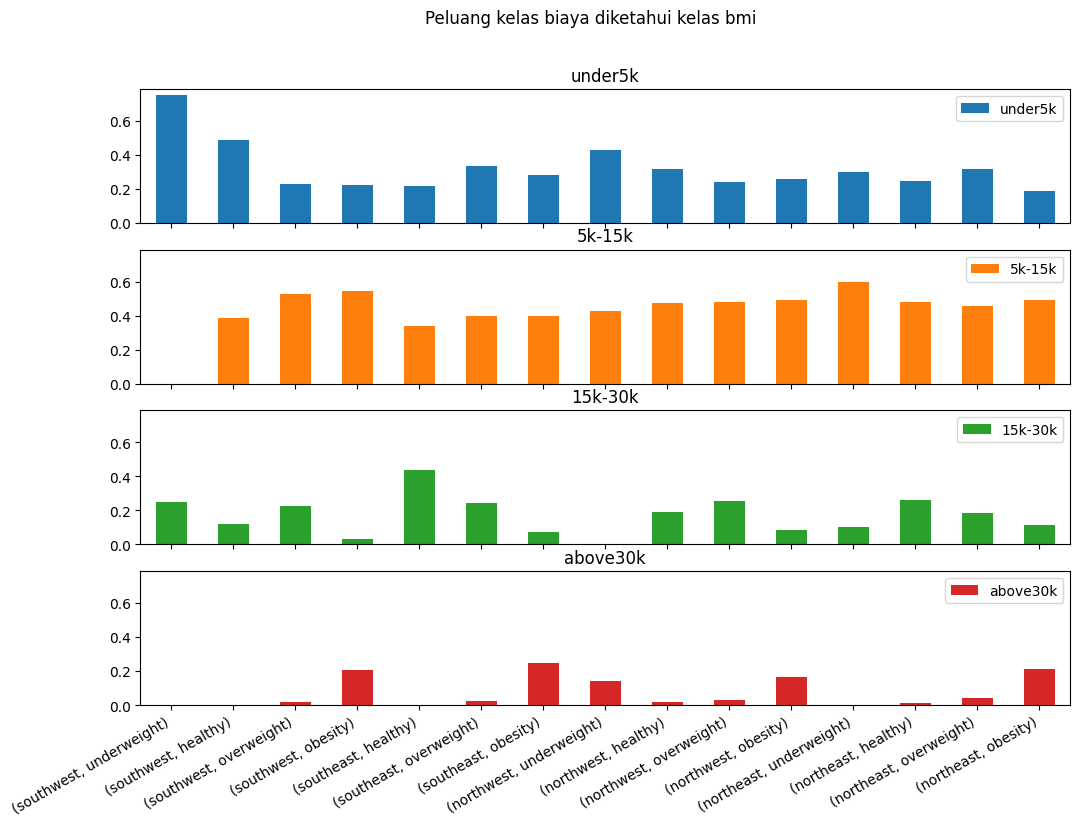

In [121]:
P_expensesclass_given_bmiclass_all.plot(kind='bar', figsize=(12,8), rot=30, subplots=True, sharey=True, sharex=True) 
plt.xlabel('')
plt.xticks(rotation=30, horizontalalignment='right')
plt.suptitle('Peluang kelas biaya diketahui kelas bmi')
plt.show()

In [122]:
# Peluang kelas biaya diketahui kelas usia

P_expensesclassSW_given_ageclass = pd.crosstab(dfsw['age_class'], dfsw['expenses_class'], normalize='index') 
P_expensesclassSE_given_ageclass = pd.crosstab(dfse['age_class'], dfse['expenses_class'], normalize='index')
P_expensesclassNW_given_ageclass = pd.crosstab(dfnw['age_class'], dfnw['expenses_class'], normalize='index') 
P_expensesclassNE_given_ageclass = pd.crosstab(dfne['age_class'], dfne['expenses_class'], normalize='index')

P_expensesclass_given_ageclass_all = (pd.concat([P_expensesclassSW_given_ageclass, P_expensesclassSE_given_ageclass, 
P_expensesclassNW_given_ageclass, P_expensesclassNE_given_ageclass], keys=['southwest', 'southeast', 'northwest', 'northeast']))
P_expensesclass_given_ageclass_all

expenses_class        under5k    5k-15k   15k-30k  above30k
          age_class                                        
southwest ~20        0.717949  0.025641  0.153846  0.102564
          20-40      0.465116  0.279070  0.108527  0.147287
          40-60      0.000000  0.837037  0.096296  0.066667
          60~        0.000000  0.681818  0.090909  0.227273
southeast ~20        0.708333  0.062500  0.083333  0.145833
          20-40      0.493056  0.222222  0.145833  0.138889
          40-60      0.000000  0.653061  0.156463  0.190476
          60~        0.000000  0.480000  0.280000  0.240000
northwest ~20        0.658537  0.024390  0.195122  0.121951
          20-40      0.458015  0.351145  0.137405  0.053435
          40-60      0.000000  0.746154  0.138462  0.115385
          60~        0.000000  0.565217  0.347826  0.086957
northeast ~20        0.684211  0.157895  0.078947  0.078947
          20-40      0.404580  0.290076  0.206107  0.099237
          40-60      0.000000  0.731343  0.149254  0.119403
          60~        0.000000  0.666667  0.190476  0.142857

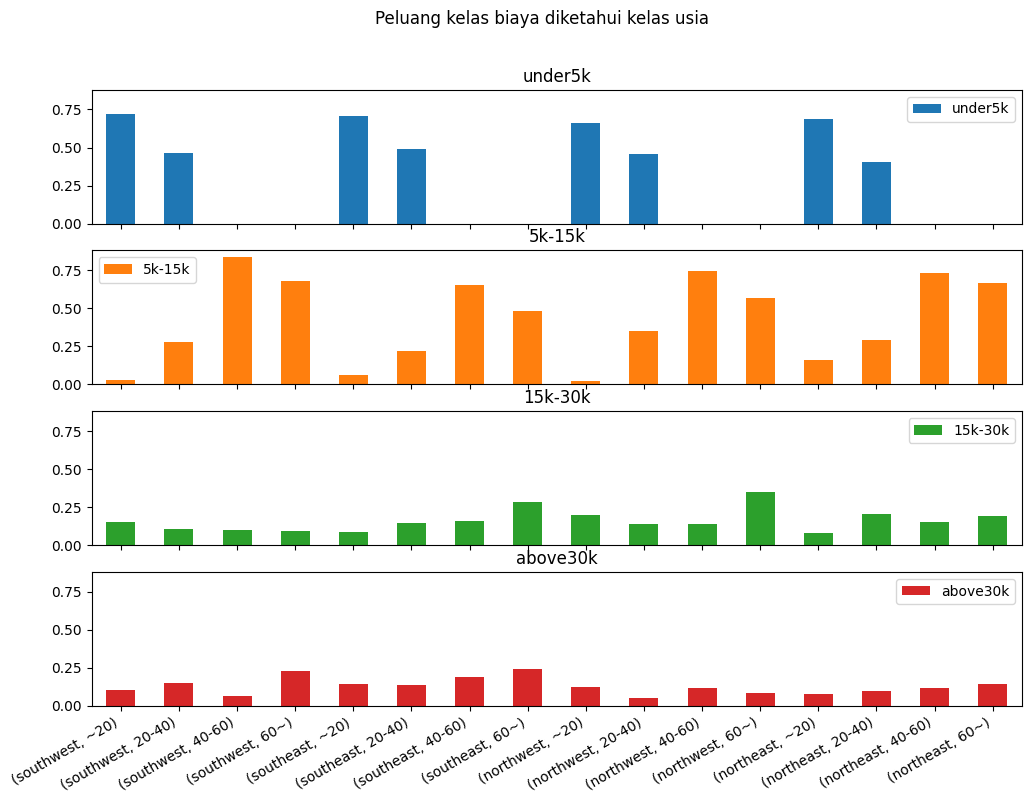

In [123]:
P_expensesclass_given_ageclass_all.plot(kind='bar', figsize=(12,8), rot=30, subplots=True, sharey=True) 
plt.xlabel('')
plt.xticks(rotation=30, horizontalalignment='right')
plt.suptitle('Peluang kelas biaya diketahui kelas usia')
plt.show()

In [126]:
df.groupby(['smoker', 'bmi_class']).expenses_class.value_counts(normalize=True)

smoker  bmi_class            
no      underweight  under5k     0.562500
                     5k-15k      0.437500
                     15k-30k     0.000000
                     above30k    0.000000
        healthy      5k-15k      0.528409
                     under5k     0.403409
                     15k-30k     0.062500
                     above30k    0.005682
        overweight   5k-15k      0.580442
                     under5k     0.343849
                     15k-30k     0.063091
                     above30k    0.012618
        obesity      5k-15k      0.594595
                     under5k     0.306306
                     15k-30k     0.090090
                     above30k    0.009009
yes     underweight  5k-15k      0.400000
                     15k-30k     0.400000
                     above30k    0.200000
                     under5k     0.000000
        healthy      15k-30k     0.880000
                     5k-15k      0.100000
                     above30k    0.020000
    

Mana yang lebih mungkin terjadi

*   Seseorang perokok dengan BMI diatas 25 (overweight) mendapatkan tagihan kesehatan

di atas 15k -> 0.92 + 0.08 = 1
*   Seseorang non perokok dengan BMI diatas 25 (overweight) mendapatkan tagihan kesehatan

di atas 15k -> 0.06 + 0.01 = 0.07



**Variabel kontinu pada BMI**

<Axes: >

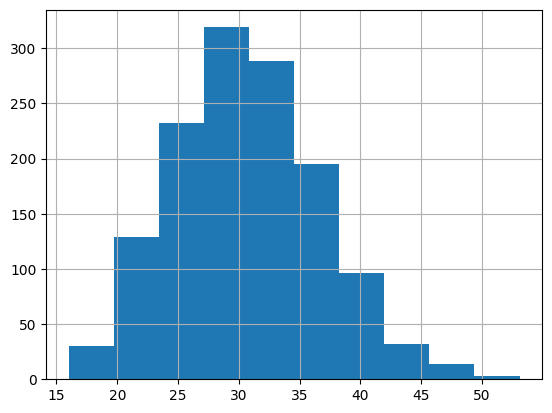

In [127]:
df.bmi.hist()

Histogram BMI terlihat terdistribusi normal.

Distribusi Normal memiliki 2 parameter yaitu rata-rata () dan variance () dimana memiliki fungsi PDF sebagai berikut. **cari & lengkapi dengan persamaan math!!**

In [128]:
# Mencari mean dan varians BMI

from scipy.stats import norm

bmi_mean = round(df.bmi.mean(),2)
bmi_var = round(df.bmi.var(),2)

print(f'BMI mean: {bmi_mean}') 
print(f'BMI varians: {bmi_var}')

BMI mean: 30.67
BMI varians: 37.19


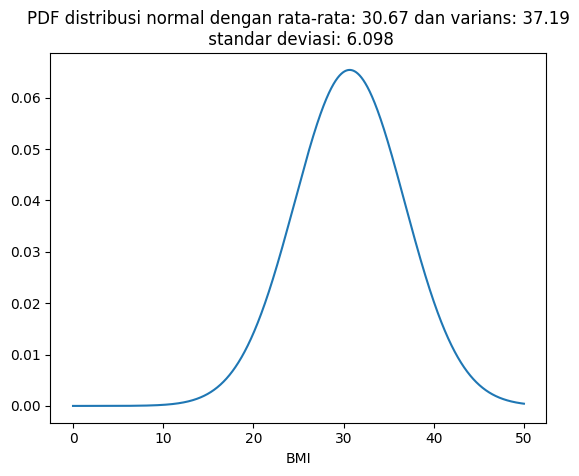

In [129]:
# Plot grafik distribusi normal dari BMI

def pdf_normal(x, mu, var):
    return (1 / np.sqrt(2 * np.pi * var)) *\
        np.exp(-(1 / (2 * var)) * (x - mu) ** 2) # simulasi distribusi normal

x_axis = np.arange(0, 50, 0.01)
y_axis = pdf_normal(x_axis, bmi_mean, bmi_var)
plt.plot(x_axis, y_axis)
plt.xlabel('BMI')
plt.title('PDF distribusi normal dengan rata-rata: '+str(bmi_mean)+' dan varians: '+str(bmi_var)+'\n standar deviasi: ' + str(np.round(np.sqrt(bmi_var),3)))
plt.show()

In [130]:
# Peluang pengguna dengan BMI kurang dari x

x = 35
std = np.sqrt(bmi_var)
P_bmi_below_x = norm.cdf(x, bmi_mean, std)
print(f'Peluang pengguna dengan BMI kurang dari {x}: {P_bmi_below_x:.2f}')

Peluang pengguna dengan BMI kurang dari 35: 0.76


In [131]:
# Peluang pengguna dengan BMI lebih dari x

x = 35
P_bmi_above_x = 1-norm.cdf(x, bmi_mean, std)
print(f'Peluang pengguna dengan BMI di atas {x}: {P_bmi_above_x:.2f}')

Peluang pengguna dengan BMI di atas 35: 0.24


In [132]:
# Peluang kurang dari 30
x1 = 30
P1 = norm.cdf(x1, bmi_mean, std)

# Peluang kurang dari 35
x2 = 35
P2 = norm.cdf(x2, bmi_mean, std)

# Mean
P_bmi_between = P2-P1
print(f'Peluang pengguna dengan BMI diantara {x1} hingga {x2} adalah: {P_bmi_between:.2f}')

Peluang pengguna dengan BMI diantara 30 hingga 35 adalah: 0.30


In [133]:
# Ditanyakan x

P = 0.8
x = norm.ppf(P, bmi_mean, std)
print('Jika diketahui peluangnya sekitar 80% maka BMI pengguna kurang dari',np.round(x,2))

Jika diketahui peluangnya sekitar 80% maka BMI pengguna kurang dari 35.8


**Uji Statistik**


Uji hipotesis adalah metode pengambilan keputusan yang didasarkan dari analisis data, baik dari percobaan yang terkontrol, maupun dari observasi (tidak terkontrol). Dalam statistik sebuah hasil bisa dikatakan signifikan secara statistik jika kejadian tersebut hampir tidak mungkin disebabkan oleh faktor yang kebetulan, sesuai dengan batas probabilitas yang sudah ditentukan sebelumnya.

**Apakah rata-rata biaya perokok dan non perokok berbeda sangat besar**

H0 : mu*smoker* = mu*nonsmoker*

H1 : mu*smoker* != mu*nonsmoker*

In [135]:
# Menentukan nilai alpha (signifikansi)

alpha = 0.05

# Membandingkan variansi expenses perokok dan non perokok

smokers = df[df['smoker_norm'] == 1] 
nonsmokers = df[df['smoker_norm'] == 0] 

smokers_expenses = smokers['expenses']
nonsmokers_expenses = nonsmokers['expenses']

smokers_expenses_var = np.var(smokers_expenses)
nonsmokers_expenses_var = np.var(nonsmokers_expenses)

print('Variansi biaya pengguna perokok ', smokers_expenses_var)
print('Variansi biaya pengguna non perokok ', nonsmokers_expenses_var)

Variansi biaya pengguna perokok  132721156.87591876
Variansi biaya pengguna non perokok  35891655.249058776


In [136]:
# Uji statatistik menggunakan t test

from scipy.stats import ttest_ind

t_stats, p_value = ttest_ind(smokers_expenses, nonsmokers_expenses, equal_var=False, alternative='two-sided')
print(f't_stats: {t_stats}')
print(f'p_value: {p_value}')

t_stats: 32.751887340417625
p_value: 5.889487102677626e-103


In [137]:
p_value > alpha

False

Karena p_value lebih besar daripada alpha bernilai False, maka tolak H*0*. Dalam artian: Rata-rata biaya pengguna perokok tidak sama dengan rata-rata biaya pengguna non perokok, sehingga dapat dikatakan bahwa biaya pengguna perokok memang lebih besar daripada pengguna non perokok.

**Apakah proporsi pria perokok lebih besar daripada wanita perokok**

H*0* : P*male_smoker* = P*female_smoker*

H*1* : P*male_smoker* != P*female_smoker*

In [138]:
df.groupby(['smoker']).sex.value_counts()

smoker  sex   
no      female    547
        male      517
yes     male      159
        female    115
Name: sex, dtype: int64

In [139]:
# Proporsi pria perokok dan wanita perokok

n_males = 159+517 # total pria
n_females = 115+547 # total wanita
male_smokers = 159 # jumlah pria perokok 
female_smokers = 115 # jumlah wanita perokok

Karena pada kali ini peluang yang akan dihitung, maka digunakan z test.

In [140]:
# Menentukan nilai alpha (signifikansi)

alpha = 0.05

# Uji statistik menggunakan z test

from statsmodels.stats.proportion import proportions_ztest

z_stat, pval = proportions_ztest([female_smokers, male_smokers], [n_females, n_males], alternative='two-sided')
print(f'z statistic: {z_stat}')
print(f'p_value: {pval}')

z statistic: -2.7867402154855503
p_value: 0.005324114164320532


In [141]:
# Nilai Critical Value 

import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(f'Nilai z ciritcal: {z_crit}')

Nilai z ciritcal: 1.6448536269514722


Text(0.5, 1.0, 'z-statistic = -2.78')

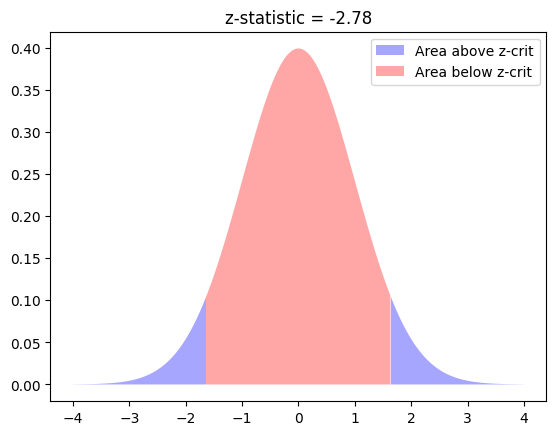

In [142]:
# Plot untuk mengethaui area z critical

plt.fill_between(x=np.arange(1.64,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.64,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-crit')

plt.fill_between(x=np.arange(-1.64,-4,-0.01), 
                 y1= stats.norm.pdf(np.arange(-1.64,-4,-0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 #label= 'Area above z-crit'
                 )

plt.fill_between(x=np.arange(-1.64,1.64,0.01),
                 y1= stats.norm.pdf(np.arange(-1.64,1.64,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-crit')
plt.legend()
plt.title ('z-statistic = -2.78')

Bila dilakukan uji dua pihak terhadap nilai z, didapat nilai z critical adalah +-1.64 dan nilai z statistik -2.78. Sehingga nilai z statistik berada di area penolakan null hipotesis. Dengan kata lain, menolak H0.

Apabila dilakukan pembandingan nilai p_value dan alpha (0.05), di mana p_value = 0.0053 sehingga bernilai lebih kecil dari alpha.

In [143]:
p_value < - alpha

False

Nilai p_value lebih kecil daripada alpha bernilai False, maka H0 tertolak. Dalam artian: proporsi pria perokok tidak sama dengan proporsi wanita perokok, sehingga dapat dikatakan bahwa proporsi pria perokok memang lebih banyak daripada wanita perokok

In [144]:
z_stat < -(z_crit/2)

True

Jika yang dibandingkan adalah nilai z nya, maka hasilnya akan sama, yaitu tolak H0. Karena ini adalah uji dua pihak, dan nilai z statistiknya kurang dari nilai -(z kritis/2) bernilai True, maka tolak H0.